# Global_Power_Plant_Database_Project

# Problem Statement:

Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators: 


. country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

. country_long (text): longer form of the country designation

. name (text): name or title of the power plant, generally in Romanized form

. gppd_idnr (text): 10 or 12 character identifier for the power plant

. capacity_mw (number): electrical generating capacity in megawatts

. latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

. longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

. primary_fuel (text): energy source used in primary electricity generation or export

. other_fuel1 (text): energy source used in electricity generation or export

. other_fuel2 (text): energy source used in electricity generation or export

. other_fuel3 (text): energy source used in electricity generation or export

. commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

. owner (text): majority shareholder of the power plant, generally in Romanized form

. source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

. url (text): web document corresponding to the source field

. geolocation_source (text): attribution for geolocation information

. wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

. year_of_capacity_data (number): year the capacity information was reported

. generation_data_source (text): attribution for the reported generation information

. generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

. generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

. generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

. generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

. generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

. generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

. generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

. estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

. estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

. estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

. estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

. estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

. estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

. estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

. estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

. estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

. estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

# Prediction:
We have to make two prediction for labels 1) primary_fuel 2) capacity_mw

In [312]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import norm

# Algorithms
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
import pingouin as pg
from imblearn.over_sampling import SMOTE
from statsmodels.formula.api import ols
import statsmodels.api as sm
import reverse_geocoder as rg
import pprint

from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,power_transform
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from xgboost import XGBRegressor,XGBClassifier
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier.rocauc import roc_auc

import pickle
import joblib


# Loading the Dataset

In [313]:
df=pd.read_csv('global-power-plant-database.csv')

In [314]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
#checking the dimension of the dataset
df.shape

(908, 25)

Remarks: The dataset consisys of 908 rows and 25 columns.

We are required to predict 2 labels 'primary_fuel' and 'capacity_mw'. By looking at the values present in the column 'primary_fuel', we see that there are categorical data in that colum. Considering it as our label then it will be a Classification problem.

And if we look at the values present in the column 'capacity_mw', we see that there are continous data in that column so considering it as our label, it will be a Regression problem.

# Data Exploration/Analysis

In [316]:
#checking the first 5 entries of the dataset
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [317]:
#checking the last 5 entries of the dataset
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
#checking column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [319]:
#checking the datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Observations:

We see that there are many missing values in our dataset.

There are 13 numerical features and 12 discrete(categorical) features.    

In [320]:
#checking for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

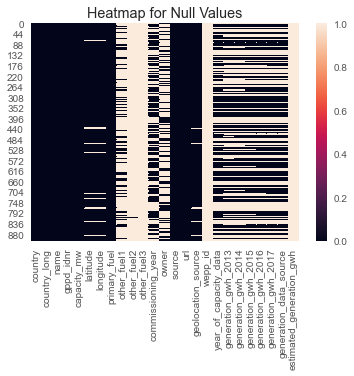

In [321]:
#visualizing the null count with heatmap
sns.heatmap(df.isnull())
plt.title("Heatmap for Null Values")
plt.show()

Remarks: We can see that there are missing values in many columns and few even have all the 908 rows empty that will need to be removed since it provides no insights.

Only 25-30% of missing value can be allowed in the dataset and greater than that need to be removed.
Columns that need to be deleted are:

-other_fuel1

-other_fuel2

-other_fuel3

-owner

-wepp_id

-year_of_capacity_data

-generation_gwh_2013

-generation_gwh_2014

-generation_gwh_2015

-generation_gwh_2016

-generation_gwh_2017

-generation_data_source

-estimated_generation_gwh

# Profiling:

We are checking Profiling before pre-processing dataset to get initial observations from the dataset in better visual aspects

In [322]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

# Statistical Analysis

In [323]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


Observations:

We can see the columns are having different count which indicates the dataset contains missing values.

# Data pre-processing

In [324]:
#dropping the columns having more than 30% missing values
df.drop(['other_fuel1',                 
'other_fuel2',                
'other_fuel3',                 
'commissioning_year',          
'owner',
'wepp_id',                     
'year_of_capacity_data',       
'generation_gwh_2013',         
'generation_gwh_2014',         
'generation_gwh_2015',         
'generation_gwh_2016',         
'generation_gwh_2017',         
'generation_data_source',      
'estimated_generation_gwh','url'],axis=1,inplace=True)

In [325]:
#checking the dimension of the dataset after dropping the columns
df.shape

(908, 10)

In [326]:
#checking the null values after dropping some columns
df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [327]:
#checking unique values
df.nunique()

country                 1
country_long            1
name                  908
gppd_idnr             908
capacity_mw           365
latitude              837
longitude             828
primary_fuel            8
source                191
geolocation_source      3
dtype: int64

In [328]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Datatype Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Datatype Columns are: ", float_datatype)

Object Datatype Columns are:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'source', 'geolocation_source']
Float Datatype Columns are:  ['capacity_mw', 'latitude', 'longitude']


In [329]:
# filling missing data for continous values
df['latitude']=df['latitude'].fillna("-1")
df['longitude']=df['longitude'].fillna("-1")

# filling missing data for categorical values
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [330]:
df.isnull().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

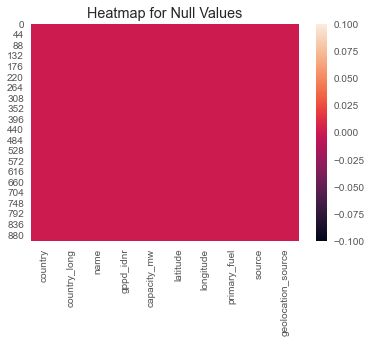

In [331]:
#visualizing the null count with heatmap
sns.heatmap(df.isnull())
plt.title("Heatmap for Null Values")
plt.show()

Remarks: In the above cell, we see that there is no any missing values in our dataset now.

In [332]:
df['gppd_idnr']=df['gppd_idnr'].str[:3]
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.609,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI
906,IND,India,ZAWAR MINES,WRI,80.0,24.35,73.7477,Coal,Hindustan Zinc ltd,WRI


In [333]:
#lets do statistics testing on columns name and source
mod = ols('capacity_mw ~ source', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
source,5.812254e+07,190.0,0.88719,0.841865
Residual,2.472256e+08,717.0,NaN,NaN


Remarks: We are getting p-value greater than 0.05 so we will drop these columns as they have no effect on target column.

In [334]:
expected, observed, stats=pg.chi2_independence(df, y='source',x='primary_fuel')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3368.508632,1330.0,5.388434e-177,0.727992,1.000000
1,cressie-read,0.666667,2480.794627,1330.0,2.513939e-72,0.624746,0.999995
2,log-likelihood,0.000000,1981.906519,1330.0,1.362704e-28,0.558405,0.999560
3,freeman-tukey,-0.500000,NaN,1330.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,1330.0,0.000000e+00,inf,1.000000
5,neyman,-2.000000,NaN,1330.0,NaN,NaN,NaN


Remarks: we will be dropping these columns after completing EDA.

# Exploratory Data Analysis(EDA)

# Univariate Analysis:

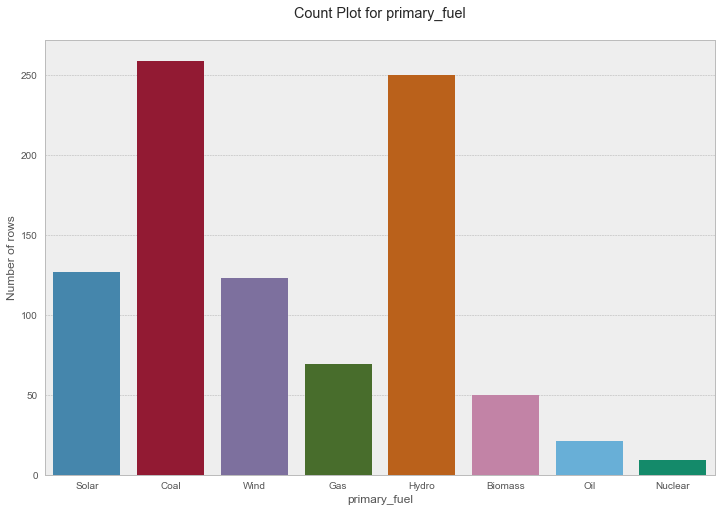

In [335]:
#checking countplot for our target column

plt.figure(figsize=(12,8))
sns.countplot(x='primary_fuel', data=df)
    
plt.title(f"Count Plot for {'primary_fuel'}\n")
plt.ylabel(f"Number of rows")
plt.show()

Observation: In the above plot, we can see that the highest number of values have been covered by coal and hydro fuel and, then comes solar and wind. We also see that gas, biomass, oil and nuclear have very low data counts.

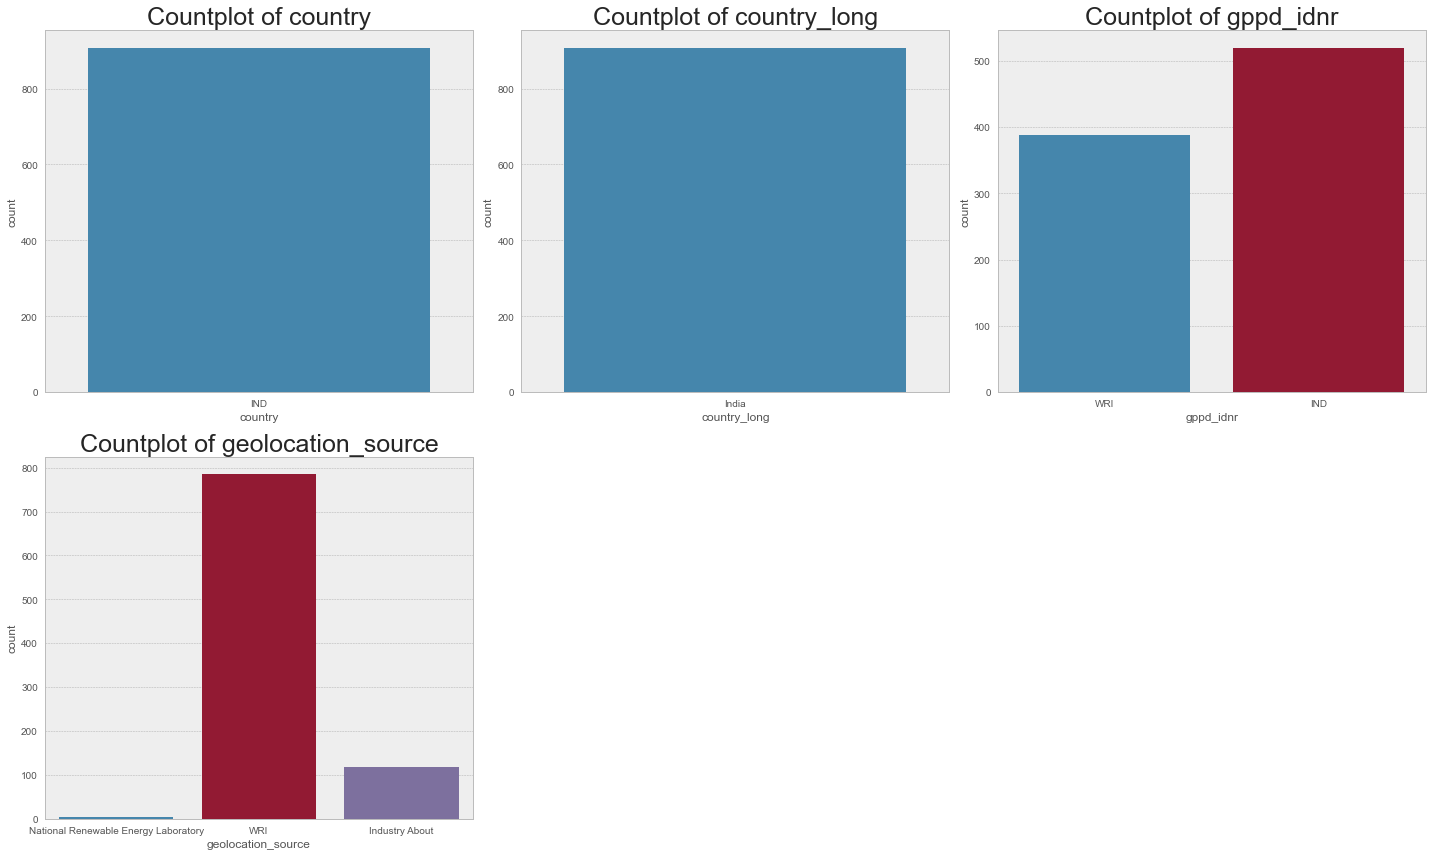

In [336]:
#checking countplot for the feature columns
col=['country','country_long','gppd_idnr','geolocation_source']

plt.figure(figsize=(20,12))
for i in range(0,len(col)):
  plt.subplot(2,3,i+1)
  sns.countplot(df[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=25)
  plt.tight_layout()

Observation:
    
    
1. From 'country' and 'country_long' countplots, we can say that there is only one value so we can drop these column.


2. From 'gppd_idnr', we see that WRI has Count of 400 and IND has count of 500 i.e., count of IND is greater than WRI.


3. From 'geolocation_source', we can see that WRI has almost 800 Count that is highest and National Renewable energy laboratory is very less which is quite negligible, and Industry About has around 100 counts.

Text(0.5, 1.0, 'Distribution of longitude')

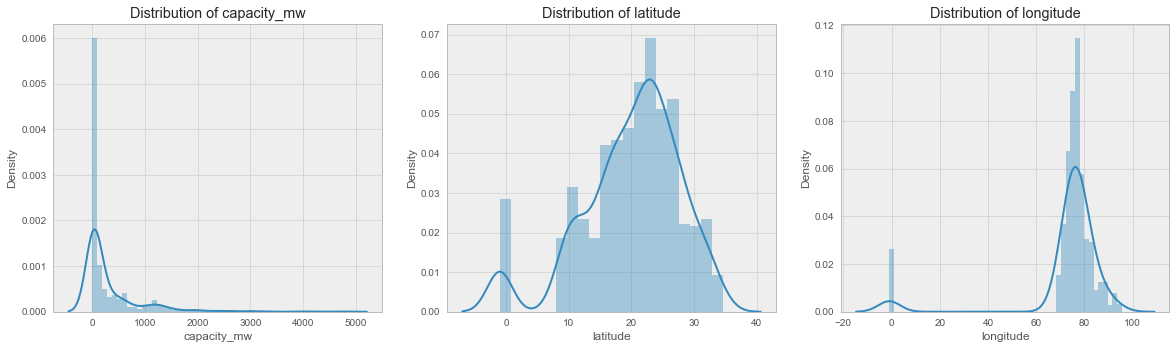

In [337]:
#checking distribution plot for the continuous values columns
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.distplot(df['capacity_mw'])
plt.title("Distribution of capacity_mw")
plt.subplot(3,3,2)
sns.distplot(df['latitude'])
plt.title("Distribution of latitude")
plt.subplot(3,3,3)
sns.distplot(df['longitude'])
plt.title("Distribution of longitude")

Observation:
    
1 From distribution of capacity_mw, we can say it has high left peak

2 From latitude, we see that it is has some data point only in middle so it has middle peak only

3 From distribution of longitude,we see that it has right peak only

All the above distribution plots are not normally distributed, it indicates that data is skewed which will be required to be treated accordingly. 

# Bivariate Analysis:

In [338]:
df['longitude']=df['longitude'].astype(float)
df['latitude']=df['latitude'].astype(float)

In [339]:
col1=['country', 'country_long', 'gppd_idnr','capacity_mw',
       'latitude', 'longitude', 'primary_fuel',
       'geolocation_source']

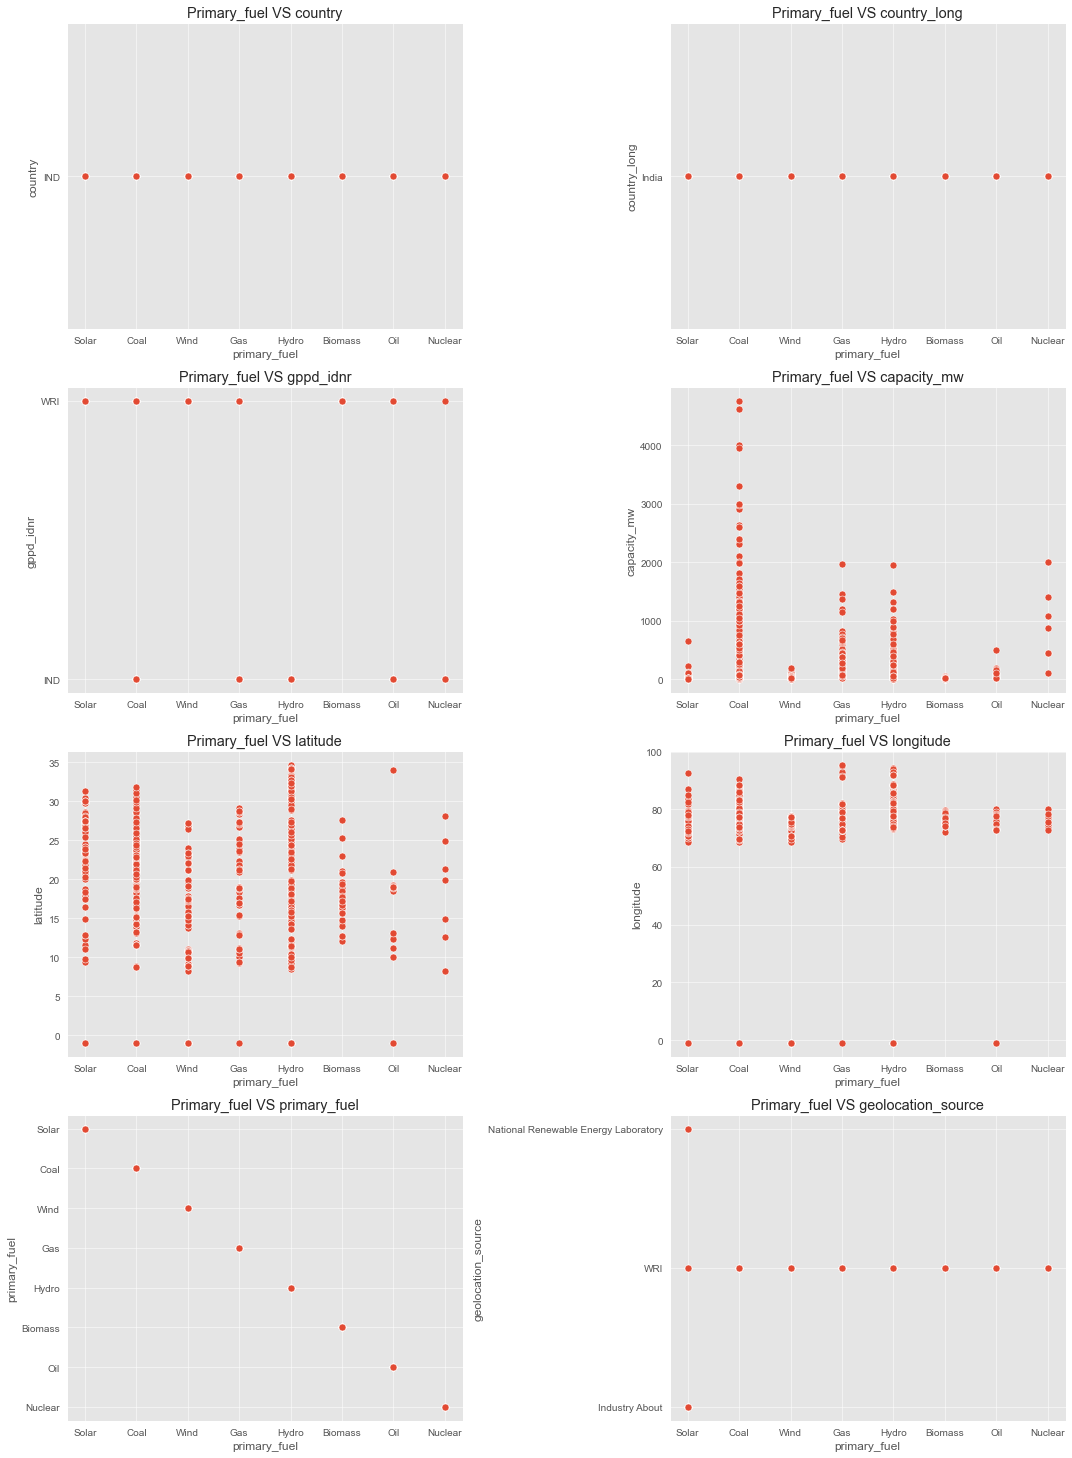

In [340]:
#checking the relationship of primary_fuel with the feature columns using scatterplot
plt.style.use('ggplot')
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=df['primary_fuel'],y=df[col1[i]])
  plt.title(f"Primary_fuel VS {col1[i]}")
  plt.tight_layout()

Observation:
  
1. From primary_fuel vs latitude plot, we can see that hydro fuel type is distributed across all the latitude values from 0 to 35.

2. From primary_fuel vs longitude plot, we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type.

3. From the primary_fuel vs capacity_mw plot, we can see that as capacity increases, consumption of coal increases.

4. From then remaining plots, we see that they contain only one value so doesn't provide much information.

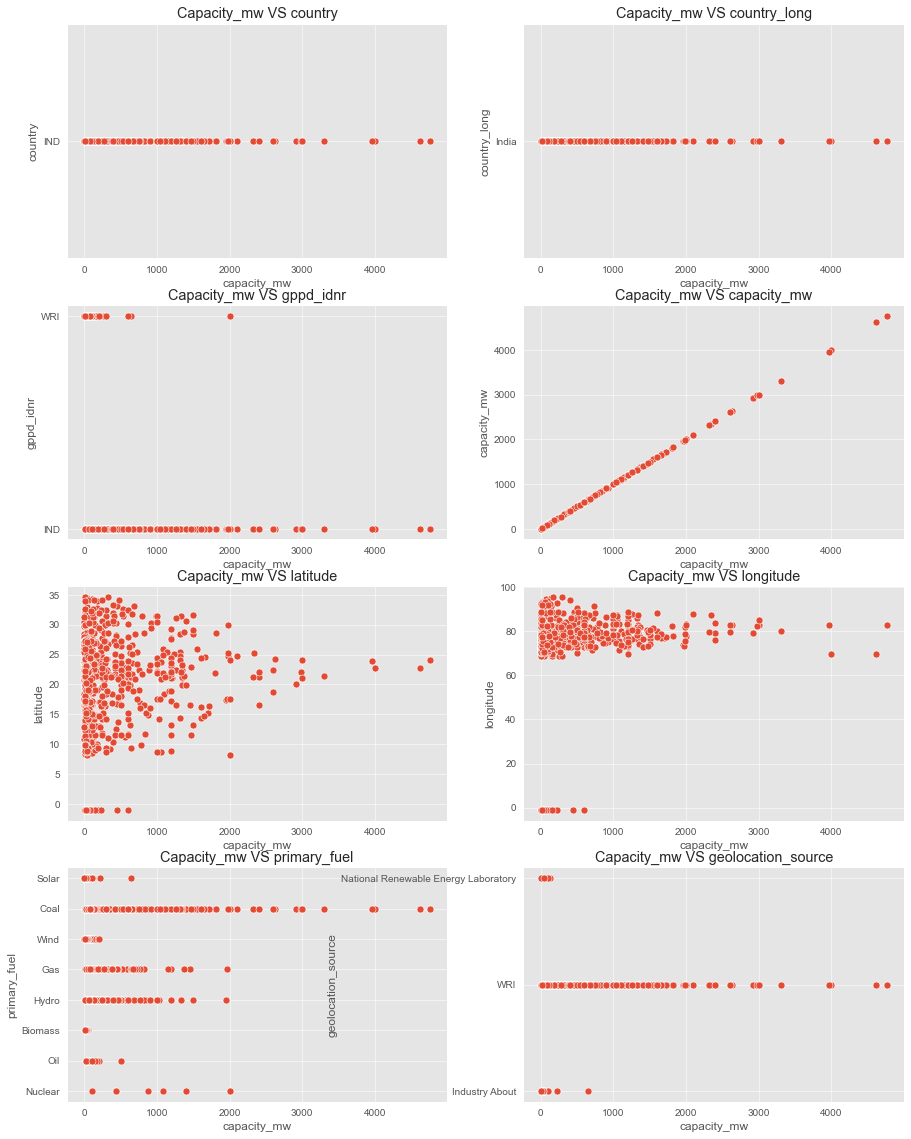

In [341]:
#checking the relationship of capacity_mw with the feature columns using scatterplot
plt.style.use('ggplot')
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=df['capacity_mw'],y=df[col1[i]])
  plt.title(f"Capacity_mw VS {col1[i]}")

Observation:
    
1. From gppd_idnr vs capacity_mw plot, we see that as the capacity_mw is increasing the gppd_idnr is also iscreasing mostly for IND.

2. From latitude vs capacity_mw plot, we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees. 

3. From longitude vs capacity_mw plot, we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

4. In primary_fuel vs capacity_mw plot, we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

5. From geolocation_source vs capacity_mw plot, we can see that as the capacity_mw is increasing, the value of WRI(Word Resource institute) is only increasing.

6. From the remaining plots, we can see that only one value is there so we cannot predict anything.

In [342]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


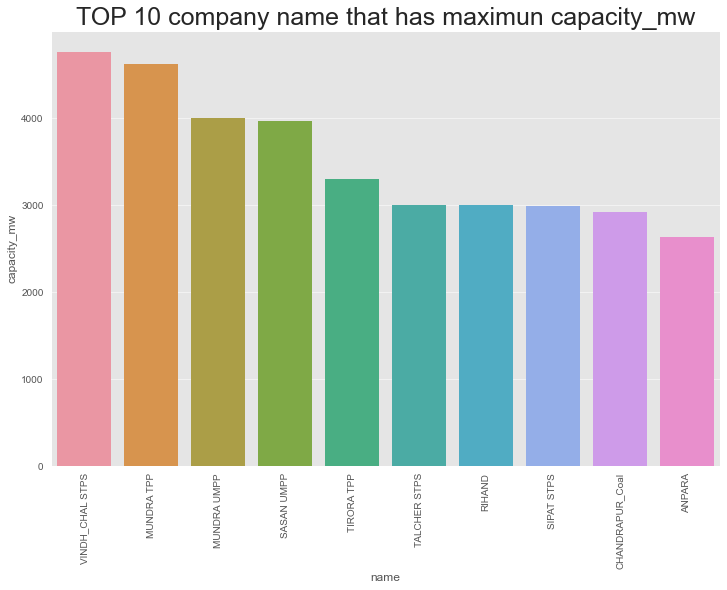

In [343]:
#plotting barplot for capacity_mw vs name
df1=df.groupby('name')['capacity_mw'].sum()
df1=df1.reset_index()
df1=df1.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1.head(10))
plt.title("TOP 10 company name that has maximun capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

Observation:

We see that vindh_chal stps is the top most company that has the maximun electrical generating capacity.

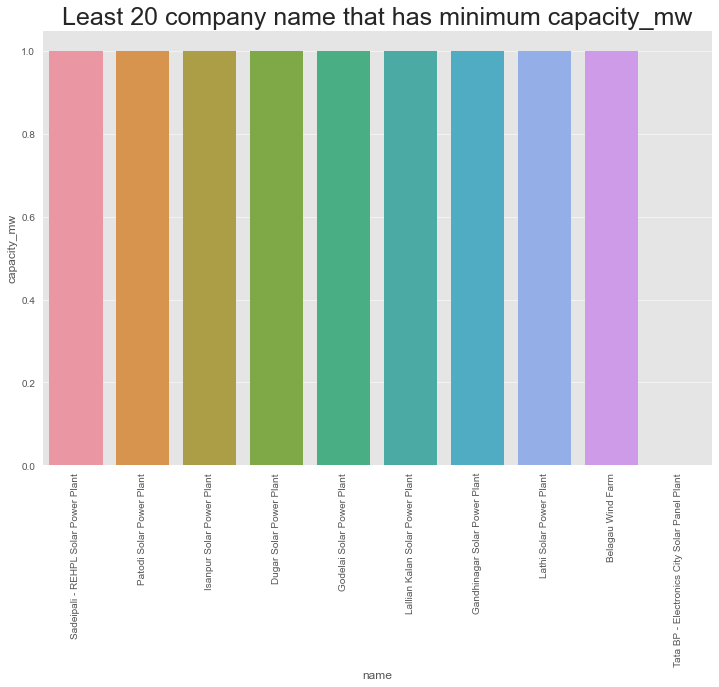

In [344]:
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1.tail(10))
plt.title("Least 20 company name that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

Observation: From the plot above we see that all these 10 company produces only 1mw power.

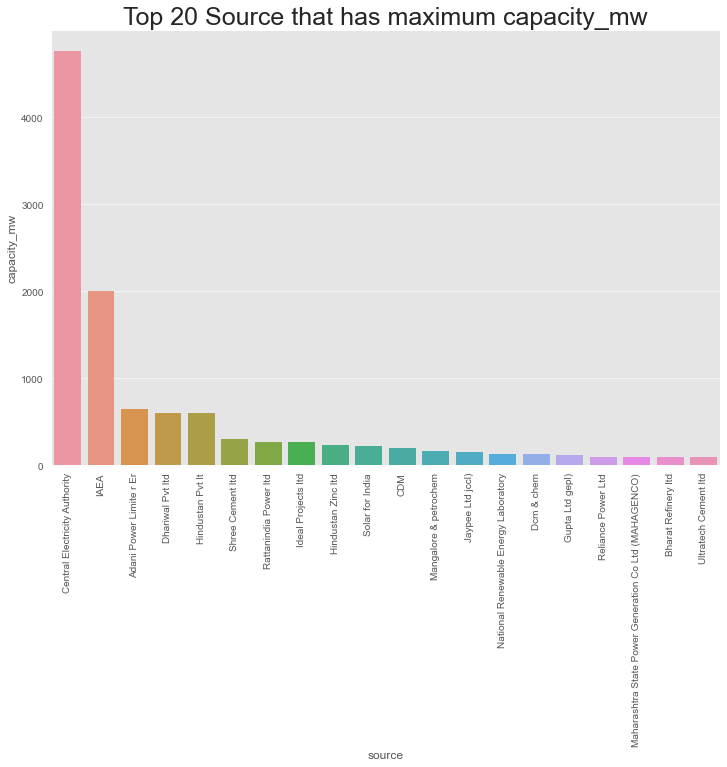

In [345]:
df2=df.groupby('source')['capacity_mw'].max()
df2=df2.reset_index()
df2=df2.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2.head(20))
plt.title("Top 20 Source that has maximum capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

Observation:

From the above graph, we see that Central Electricity Authority has the highest electrical generating capacity with more than 4000mw and Ultratech Cement ltd has the lowest value of capacity_mw.

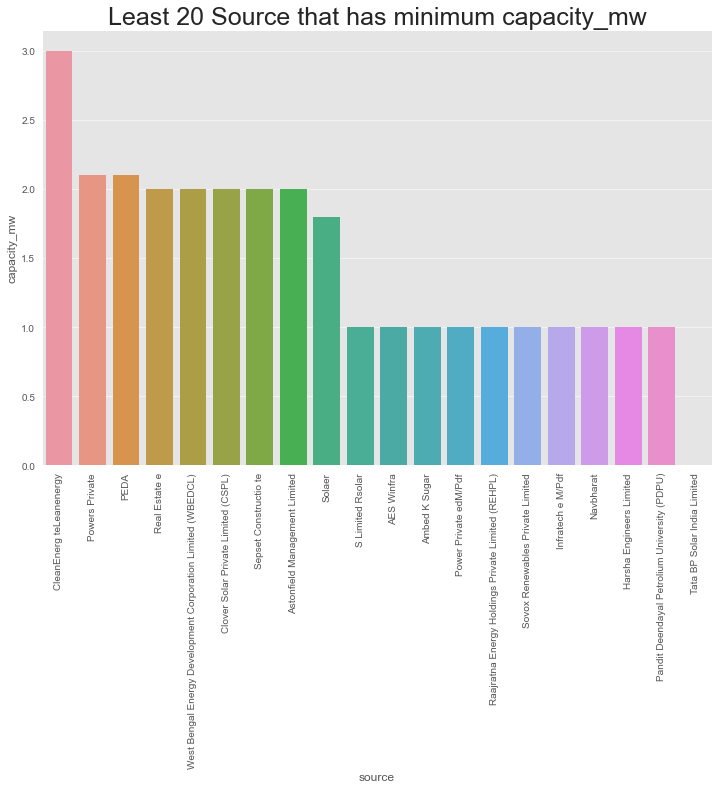

In [346]:
plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2.tail(20))
plt.title("Least 20 Source that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [347]:
df4=df[df['primary_fuel']=='Coal']

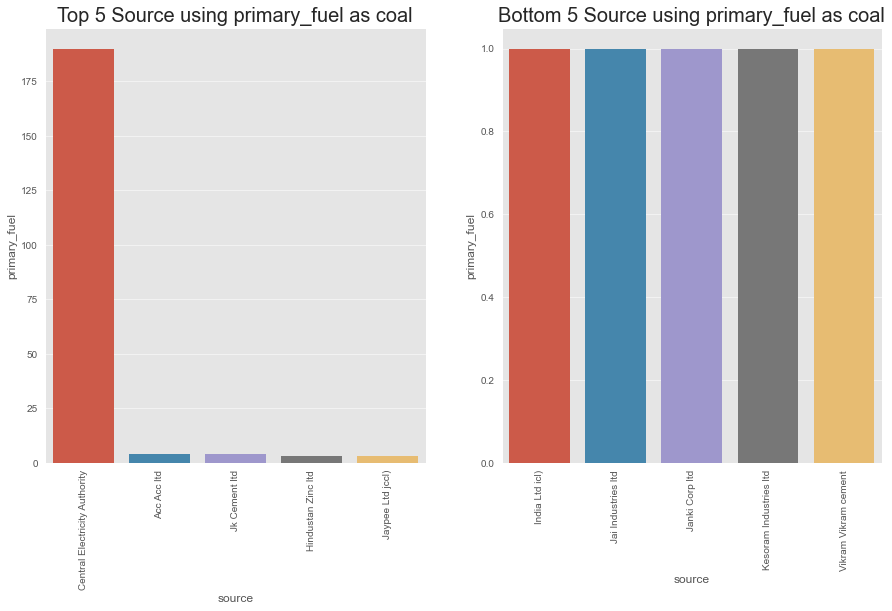

In [348]:
#checking top 5 and bottom 5 source that use coal as primary_fuel
df4=df[df['primary_fuel']=='Coal']
df5=df4.groupby('source')['primary_fuel'].count()
df5=df5.reset_index()
df5=df5.sort_values(by=('primary_fuel'),ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x='source',y='primary_fuel',data=df5.head(5))
plt.title("Top 5 Source using primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='source',y='primary_fuel',data=df5.tail(5))
plt.title("Bottom 5 Source using primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90)
plt.show()

Observation:
    
1. From top 5 source, we see that Central Electricity Authority use coal at very high level as compared to others.

2. From bottom 5 Source, we can see that all of them use coal equally as primary_fuel.

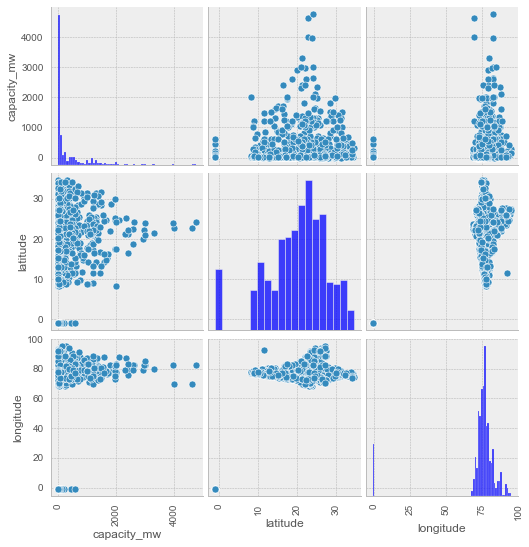

In [349]:
#checking pairplot
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

Remarks: From the above pair plot, we can see the data distribution amongst the numerical data type columns.

# Feature Engineering:

In [350]:
#using reverse geocoding to extract state and city name from given latitude and longitude
data=[]
def reverseGeocode(coordinates):
  result=rg.search(coordinates)
  return (result)
if __name__=="__main__":
  coordinates=list(zip(df['latitude'],df['longitude']))
  data1=reverseGeocode(coordinates)
  data.append(data1)

new_df=pd.DataFrame(data).transpose()

In [351]:
df['state']=new_df[0].apply(lambda x:x.get('admin1'))

df['Country']=new_df[0].apply(lambda x:x.get('cc'))

In [352]:
data_Coal=df[df['primary_fuel']=='Coal']
data_Hydro=df[df['primary_fuel']=='Hydro']
data_Solar=df[df['primary_fuel']=='Solar']
data_Wind=df[df['primary_fuel']=='Wind']
data_Gas=df[df['primary_fuel']=='Gas']
data_Biomass=df[df['primary_fuel']=='Biomass']
data_Oil=df[df['primary_fuel']=='Oil']

In [353]:
df6=data_Coal.groupby('source')['primary_fuel'].count()
df6=df6.reset_index()
df6=df6.sort_values(by=('primary_fuel'),ascending=False)

df7=data_Hydro.groupby('source')['primary_fuel'].count()
df7=df7.reset_index()
daf7=df7.sort_values(by=('primary_fuel'),ascending=False)

df8=data_Solar.groupby('source')['primary_fuel'].count()
df8=df8.reset_index()
df8=df8.sort_values(by=('primary_fuel'),ascending=False)

df9=data_Wind.groupby('source')['primary_fuel'].count()
df9=df9.reset_index()
df9=df9.sort_values(by=('primary_fuel'),ascending=False)

df10=data_Gas.groupby('source')['primary_fuel'].count()
df10=df10.reset_index()
df10=df10.sort_values(by=('primary_fuel'),ascending=False)

df11=data_Biomass.groupby('source')['primary_fuel'].count()
df11=df11.reset_index()
df11=df11.sort_values(by=('primary_fuel'),ascending=False)

df12=data_Oil.groupby('source')['primary_fuel'].count()
df12=df12.reset_index()
df12=df12.sort_values(by=('primary_fuel'),ascending=False)

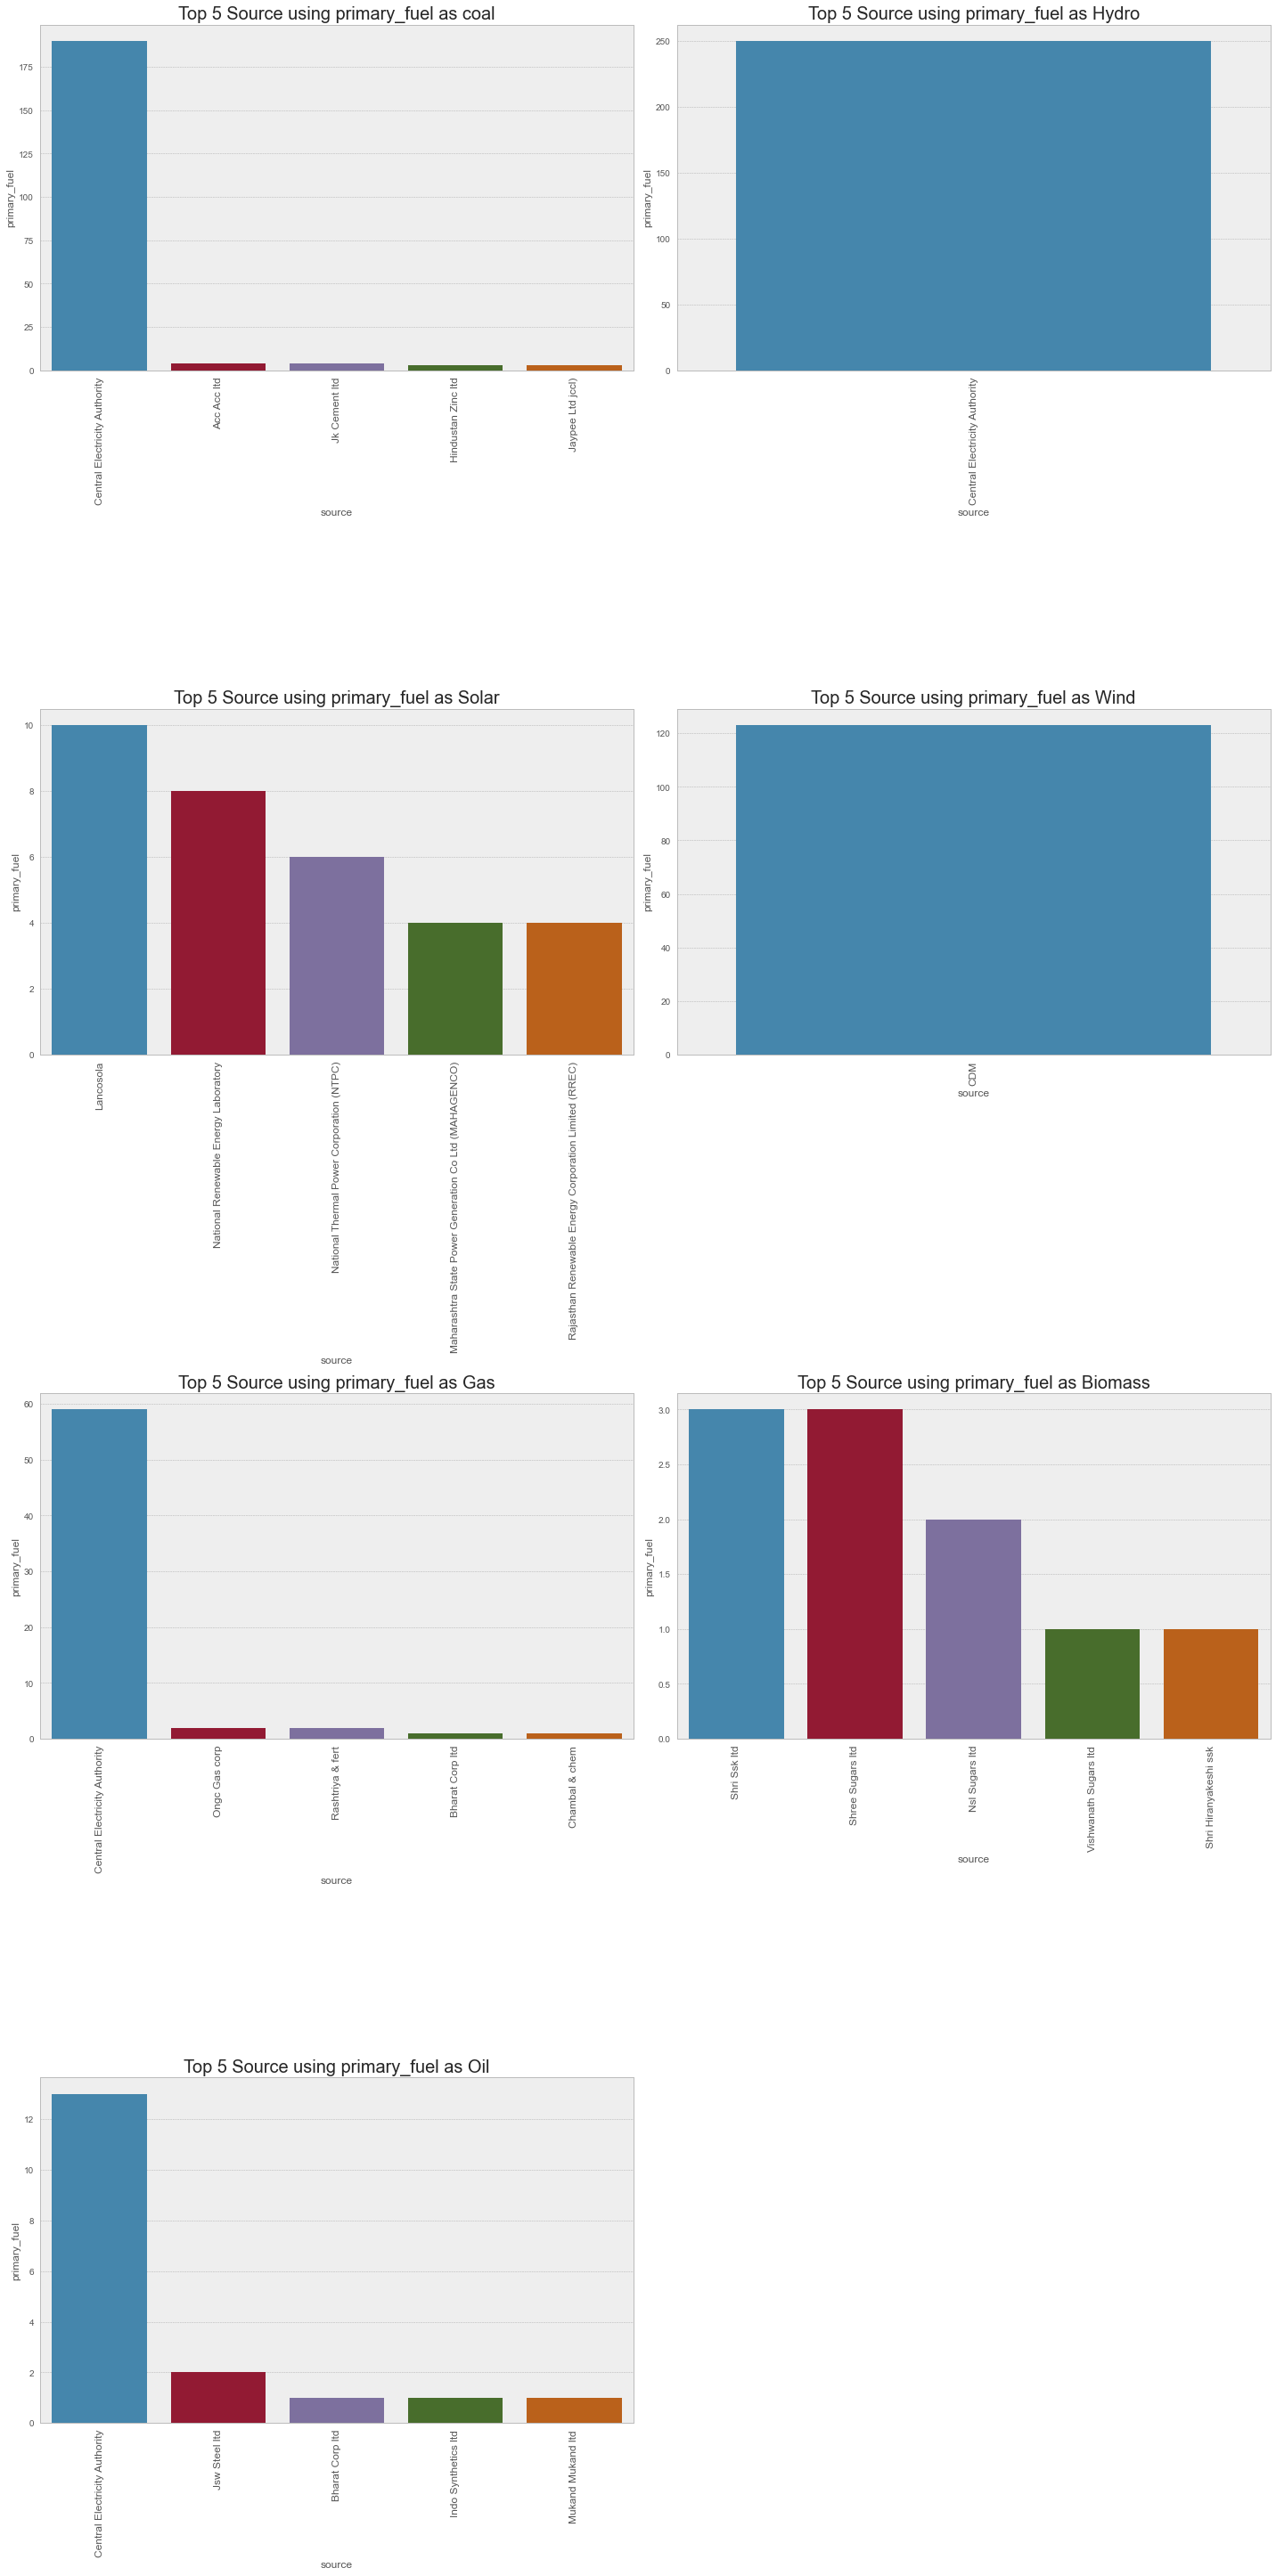

In [354]:
#checking the top 5 source that use different type of fuels using barplot
plt.figure(figsize=(20,70))
plt.subplot(7,2,1)
sns.barplot(x='source',y='primary_fuel',data=df6.head(5))
plt.title("Top 5 Source using primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,2)
sns.barplot(x='source',y='primary_fuel',data=df7.head(5))
plt.title("Top 5 Source using primary_fuel as Hydro",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,3)
sns.barplot(x='source',y='primary_fuel',data=df8.head(5))
plt.title("Top 5 Source using primary_fuel as Solar",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,4)
sns.barplot(x='source',y='primary_fuel',data=df9.head(5))
plt.title("Top 5 Source using primary_fuel as Wind",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,5)
sns.barplot(x='source',y='primary_fuel',data=df10.head(5))
plt.title("Top 5 Source using primary_fuel as Gas",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,6)
sns.barplot(x='source',y='primary_fuel',data=df11.head(5))
plt.title("Top 5 Source using primary_fuel as Biomass",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,7)
sns.barplot(x='source',y='primary_fuel',data=df12.head(5))
plt.title("Top 5 Source using primary_fuel as Oil",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()

Observation:
    
1.Top 5 source using coal as primary fuel are

-Central Electricity Authority

-Acc Acc ltd

-Jk Cement ltd

-Hindustan Zinc ltd

-Jaypee Ltd jccl

2. Top 5 Source using primary_fuel as Solar are:
    
-Lancosola

-National Renewable Energy Laboratory

-National Thermal Power Corporation (NTPC)

-Maharashtra State Power Generation Co Ltd

-Rajasthan Renewable Energy Corporation Limited

3. Top 5 Source using primary_fuel as  Gas are

-Central Electricity Authority

-Ongc Gas corp

-Rashtriya & fert

-Bharat Corp ltd

-Chambal & chem

4. Top 5 Source using primary_fuel as Biomass are

-Shri Ssk ltd

-Shree Sugars ltd

-Nsl Sugars ltd

-Vishwanath Sugars ltd

-Shri Hiranyakeshi ssk

5. Top 5 Source using primary_fuel as Oil are

-Central Electricity Authority

-Jsw Steel ltd

-Bharat Corp ltd

-Indo Synthetics ltd

-Mukand Mukand ltd

<AxesSubplot:ylabel='capacity_mw'>

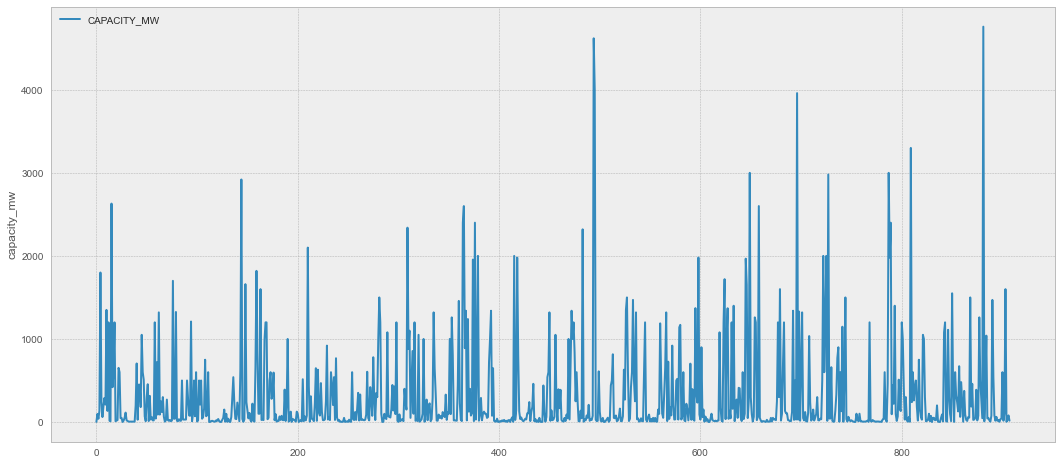

In [355]:
#checking lineplot for capacity_mw
plt.figure(figsize=(18,8))
sns.lineplot(data=df['capacity_mw'],label='CAPACITY_MW')

Remarks: We see that the flow in capacity is not increasing continuously with time. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Arunachal Pradesh'),
  Text(1, 0, 'Western Region'),
  Text(2, 0, 'Meghalaya'),
  Text(3, 0, 'Goa'),
  Text(4, 0, 'Manipur'),
  Text(5, 0, 'Nagaland'),
  Text(6, 0, 'Mizoram'),
  Text(7, 0, 'Samchi'),
  Text(8, 0, 'Pondicherry'),
  Text(9, 0, 'Andaman and Nicobar Islands')])

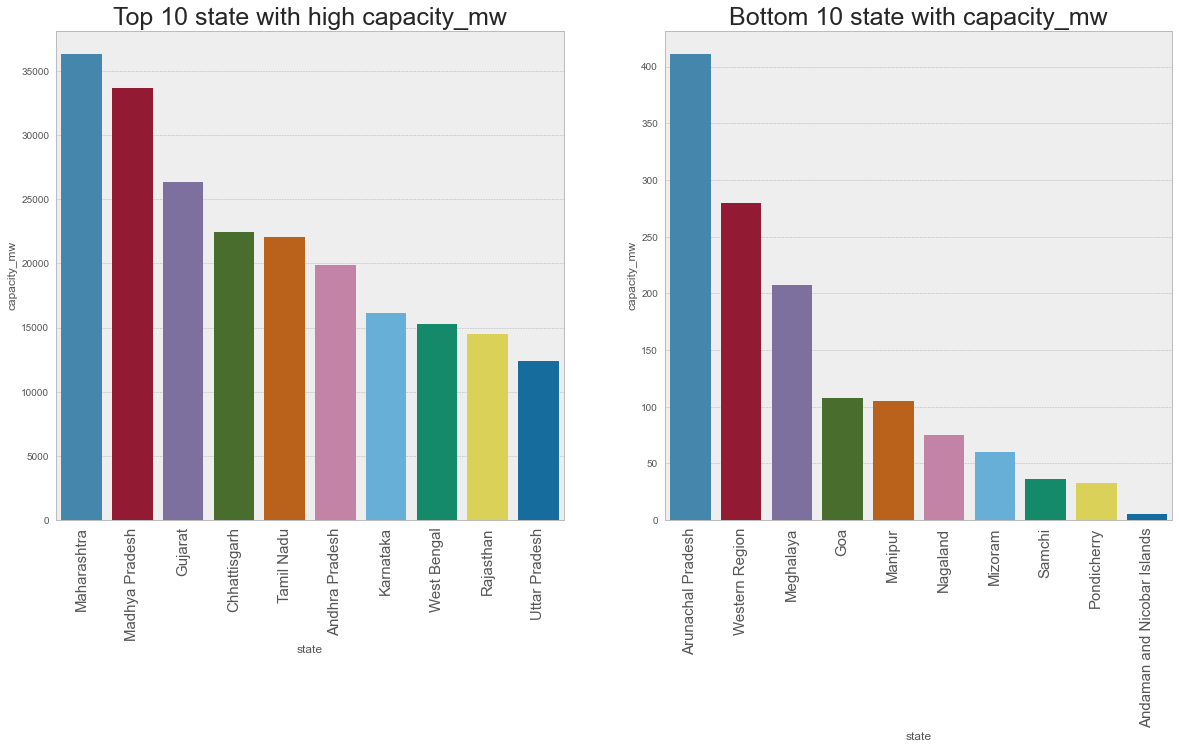

In [356]:
#checking top 10 state having high capacity_mw 
data_state=df.groupby('state')['capacity_mw'].sum()
data_state=data_state.reset_index()
data_state=data_state.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
sns.barplot(x='state',y='capacity_mw',data=data_state.head(10))
plt.title("Top 10 state with high capacity_mw",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x='state',y='capacity_mw',data=data_state.tail(10))
plt.title("Bottom 10 state with capacity_mw",fontsize=25)
plt.xticks(rotation=90,fontsize=15)

In [357]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,IN
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,IN
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,IN
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,IN
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,Karnataka,IN
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,Karnataka,IN
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI,Karnataka,IN
906,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,Rajasthan,IN


In [358]:
#Checking top 5 state using various kinds of primary_fuel
df21=data_Coal.groupby('state')['primary_fuel'].count()
df21=df21.reset_index()
df21=df21.sort_values(by=('primary_fuel'),ascending=False)

df31=data_Hydro.groupby('state')['primary_fuel'].count()
df31=df31.reset_index()
df31=df31.sort_values(by=('primary_fuel'),ascending=False)

df41=data_Solar.groupby('state')['primary_fuel'].count()
df41=df41.reset_index()
df41=df41.sort_values(by=('primary_fuel'),ascending=False)

df51=data_Wind.groupby('state')['primary_fuel'].count()
df51=df51.reset_index()
df51=df51.sort_values(by=('primary_fuel'),ascending=False)

df61=data_Gas.groupby('state')['primary_fuel'].count()
df61=df61.reset_index()
df61=df61.sort_values(by=('primary_fuel'),ascending=False)

df71=data_Biomass.groupby('state')['primary_fuel'].count()
df71=df71.reset_index()
df71=df71.sort_values(by=('primary_fuel'),ascending=False)

df81=data_Oil.groupby('state')['primary_fuel'].count()
df81=df81.reset_index()
df81=df81.sort_values(by=('primary_fuel'),ascending=False)

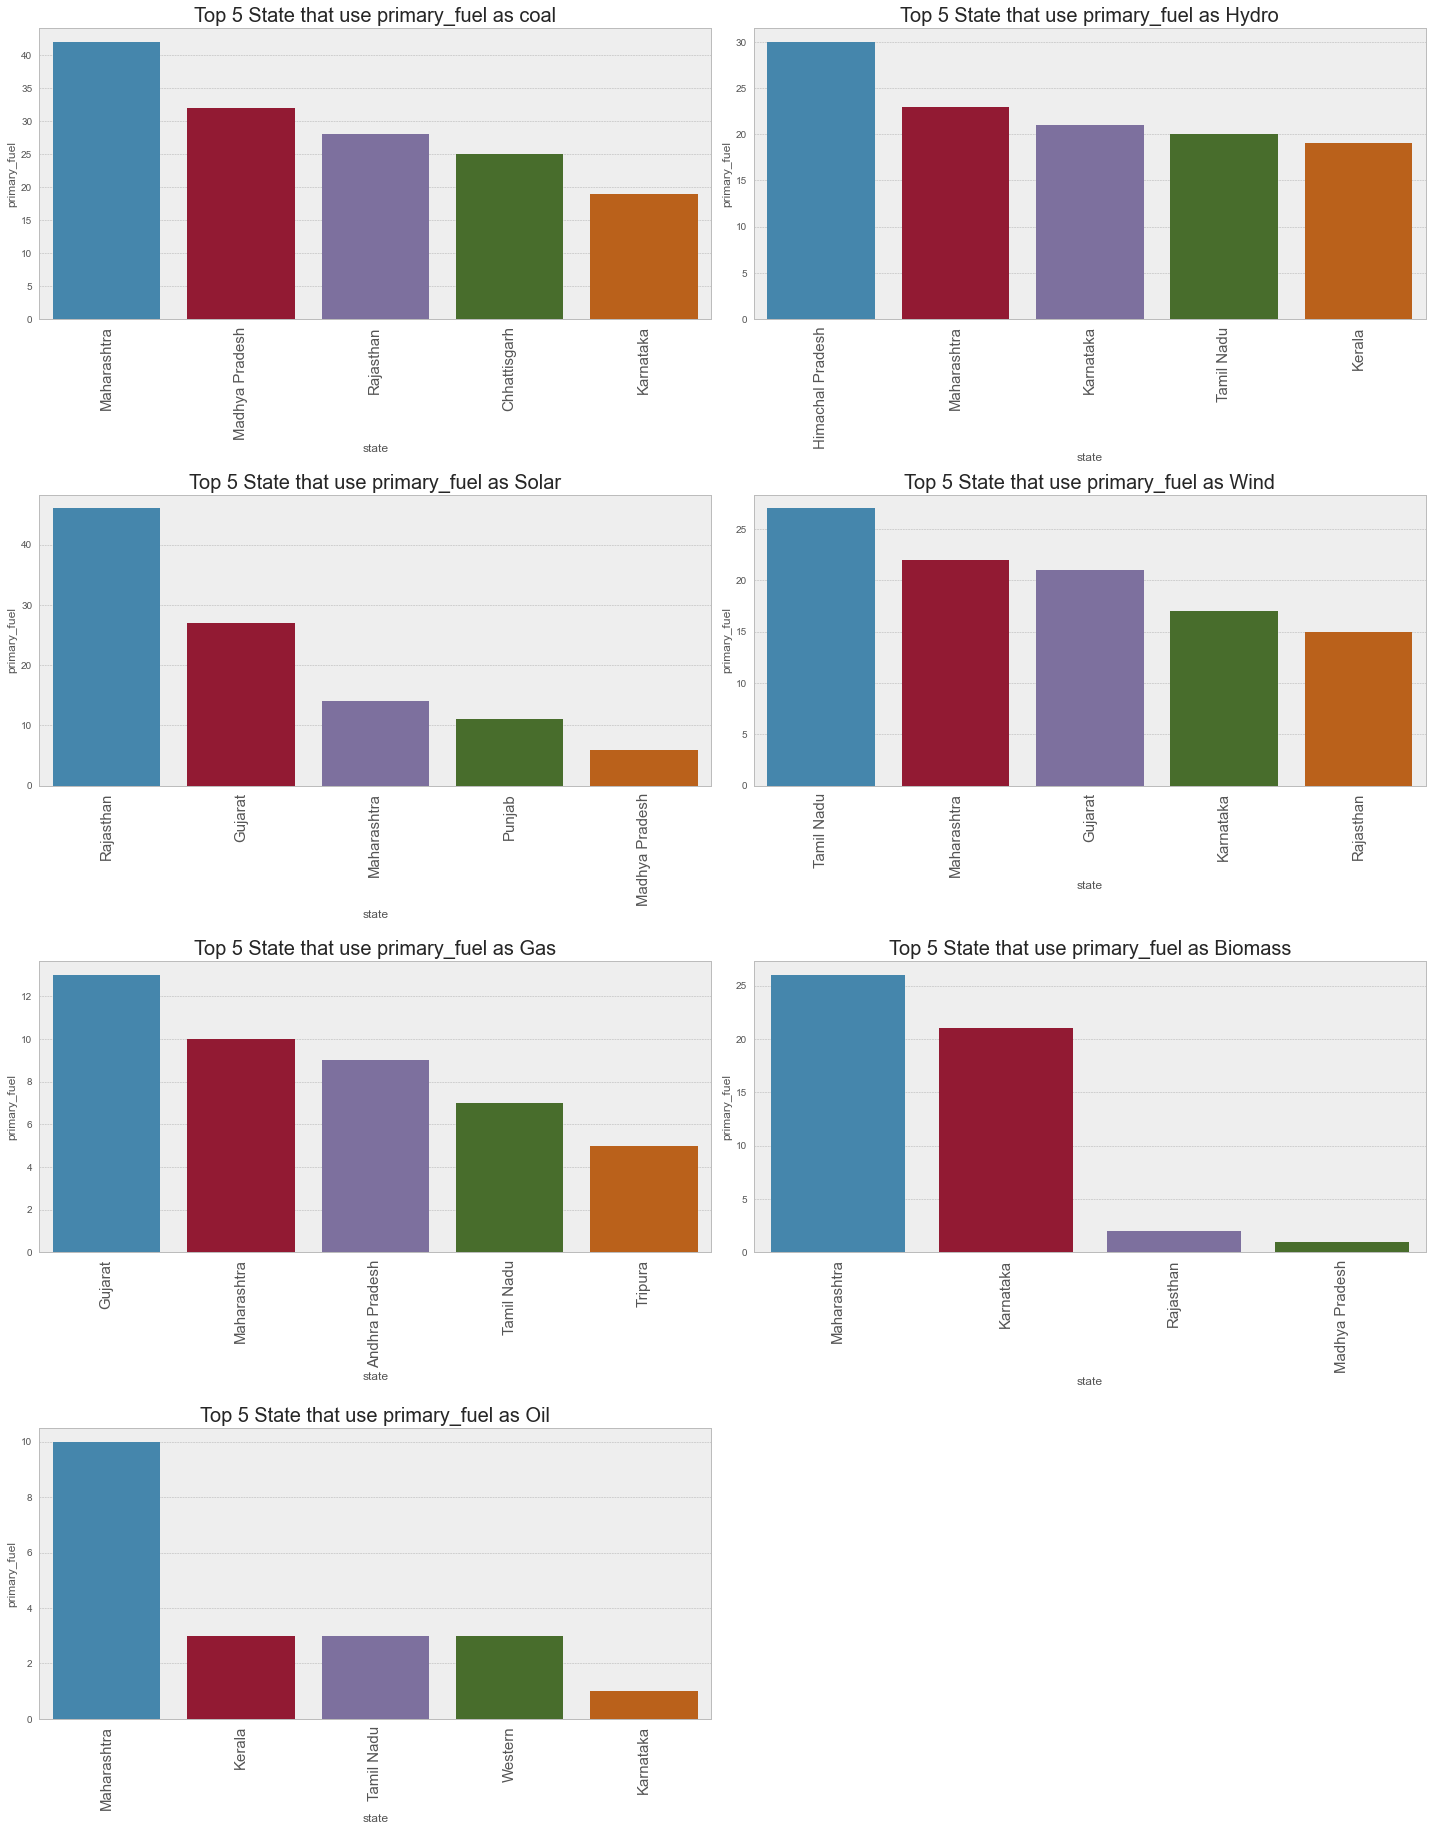

In [359]:
plt.figure(figsize=(20,50))
plt.subplot(8,2,1)
sns.barplot(x='state',y='primary_fuel',data=df21.head(5))
plt.title("Top 5 State that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,2)
sns.barplot(x='state',y='primary_fuel',data=df31.head(5))
plt.title("Top 5 State that use primary_fuel as Hydro",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,3)
sns.barplot(x='state',y='primary_fuel',data=df41.head(5))
plt.title("Top 5 State that use primary_fuel as Solar",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,4)
sns.barplot(x='state',y='primary_fuel',data=df51.head(5))
plt.title("Top 5 State that use primary_fuel as Wind",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,5)
sns.barplot(x='state',y='primary_fuel',data=df61.head(5))
plt.title("Top 5 State that use primary_fuel as Gas",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,6)
sns.barplot(x='state',y='primary_fuel',data=df71.head(5))
plt.title("Top 5 State that use primary_fuel as Biomass",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,7)
sns.barplot(x='state',y='primary_fuel',data=df81.head(5))
plt.title("Top 5 State that use primary_fuel as Oil",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()

In [360]:
#checking the country value counts
df['Country'].value_counts()

IN    860
GH     46
NP      1
BT      1
Name: Country, dtype: int64

In [361]:
#replacing country names with their full name
df['Country']=df['Country'].replace({'IN':'INDIA','GH':'GHANA','NP':'NEPAL','BT':'BHUTAN'})

In [362]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,INDIA
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,INDIA
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,INDIA
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,INDIA
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,Karnataka,INDIA
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,Karnataka,INDIA
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI,Karnataka,INDIA
906,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,Rajasthan,INDIA


In [363]:
#dropping the columns country, country_long, name, source as they dont help much in our model building
df.drop(['country','country_long','name','source'],axis=1,inplace=True)

In [364]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,Rajasthan,INDIA
1,WRI,98.0,24.7663,74.6090,Coal,WRI,Rajasthan,INDIA
2,WRI,39.2,21.9038,69.3732,Wind,WRI,Gujarat,INDIA
3,IND,135.0,23.8712,91.3602,Gas,WRI,Tripura,INDIA
4,IND,1800.0,21.9603,82.4091,Coal,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...
903,IND,1600.0,16.2949,77.3568,Coal,WRI,Karnataka,INDIA
904,WRI,3.0,12.8932,78.1654,Solar,Industry About,Karnataka,INDIA
905,WRI,25.5,15.2758,75.5811,Wind,WRI,Karnataka,INDIA
906,WRI,80.0,24.3500,73.7477,Coal,WRI,Rajasthan,INDIA


# Scaling the data:

In [365]:
#using ordinal encoder because most of the columns are having order
oe=OrdinalEncoder()
def ordinal_transform(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [366]:
print(df['primary_fuel'].unique())
print("\n")
print(df['geolocation_source'].unique())
print("\n")
print(df['state'].unique())
print("\n")
print(df['Country'].unique())
print("\n")
print(df['gppd_idnr'].unique())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']


['National Renewable Energy Laboratory' 'WRI' 'Industry About']


['Rajasthan' 'Gujarat' 'Tripura' 'Chhattisgarh' 'Tamil Nadu'
 'Himachal Pradesh' 'Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Western' 'Uttar Pradesh' 'Andhra Pradesh' 'Kashmir' 'West Bengal'
 'Odisha' 'Bihar' 'Jharkhand' 'Assam' 'Kerala' 'Uttarakhand' 'Sikkim'
 'Western Region' 'Nagaland' 'Haryana' 'Andaman and Nicobar Islands' 'NCT'
 'Samchi' 'Telangana' 'Pondicherry' 'Meghalaya' 'Manipur'
 'Arunachal Pradesh' 'Goa' 'Mizoram']


['INDIA' 'GHANA' 'NEPAL' 'BHUTAN']


['WRI' 'IND']


In [367]:
df=ordinal_transform(df,['primary_fuel','geolocation_source','Country','gppd_idnr'])

In [368]:
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,1.0,2.5,28.1839,73.2407,6.0,1.0,Rajasthan,2.0
1,1.0,98.0,24.7663,74.6090,1.0,2.0,Rajasthan,2.0
2,1.0,39.2,21.9038,69.3732,7.0,2.0,Gujarat,2.0
3,0.0,135.0,23.8712,91.3602,2.0,2.0,Tripura,2.0
4,0.0,1800.0,21.9603,82.4091,1.0,2.0,Chhattisgarh,2.0


In [369]:
#using labelencoder to transform non-numerical state labels to numerical labels
le=LabelEncoder()
df['state']=le.fit_transform(df['state'])

In [370]:
df['Capacity_as_per_fuel_type']=df['capacity_mw']/df['primary_fuel']#Adding one more feature we can find out the capacity as per the fuel type
df['Capacity_as_per_fuel_type']=df['Capacity_as_per_fuel_type'].replace([np.inf,-np.inf],np.nan) #it contains nan and inf value so removing them
df['Capacity_as_per_fuel_type']=df['Capacity_as_per_fuel_type'].fillna(0)

In [371]:
print(df['primary_fuel'].unique())
print("\n")
print(df['geolocation_source'].unique())
print("\n")
print(df['state'].unique())
print("\n")
print(df['Country'].unique())
print("\n")
print(df['gppd_idnr'].unique())

[6. 1. 7. 2. 3. 0. 5. 4.]


[1. 2. 0.]


[24  7 29  5 27  9 11 14 15 23 33 30  1 12 32 21  4 10  3 13 31 26 34 20
  8  0 19 25 28 22 17 16  2  6 18]


[2. 1. 3. 0.]


[1. 0.]


# Preparing Data for Regression Model:

In [372]:
X=df.drop(['capacity_mw','geolocation_source','Country'],axis=1)
y=df['capacity_mw']
x=X
Y=y

In [373]:
X

,gppd_idnr,latitude,longitude,primary_fuel,state,Capacity_as_per_fuel_type
0,1.0,28.1839,73.2407,6.0,24,0.416667
1,1.0,24.7663,74.6090,1.0,24,98.000000
2,1.0,21.9038,69.3732,7.0,7,5.600000
3,0.0,23.8712,91.3602,2.0,29,67.500000
4,0.0,21.9603,82.4091,1.0,5,1800.000000
...,...,...,...,...,...,...
903,0.0,16.2949,77.3568,1.0,11,1600.000000
904,1.0,12.8932,78.1654,6.0,11,0.500000
905,1.0,15.2758,75.5811,7.0,11,3.642857
906,1.0,24.3500,73.7477,1.0,24,80.000000


In [374]:
y_new=np.log(y)
y_new=y_new.replace([np.inf,-np.inf],np.nan)
y_new=y_new.fillna(0)

Text(0.5, 1.0, 'After applying log')

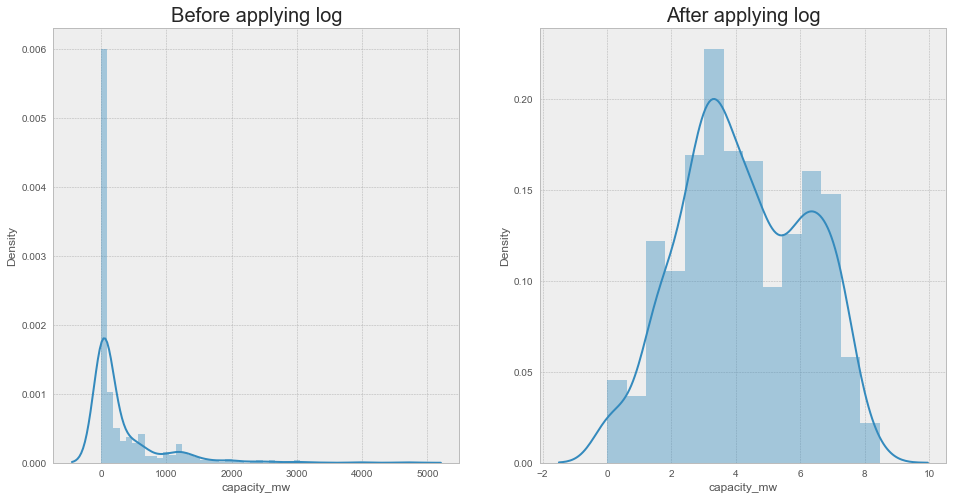

In [375]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(y)
plt.title("Before applying log",fontsize=20)
plt.subplot(1,2,2)
sns.distplot(y_new)
plt.title("After applying log",fontsize=20)

Remarks: The target column 'capacity_mw' is having very large values so we did log transformation and secondly, the target column is also right skewed so according to rule if our target column is right skewed only then we can apply log tansformation on target column. At the time of prediction, we will reverse it though.

# Feature scaling:

In [376]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new=pd.DataFrame(X_new,columns=x.columns)

# Checking skewness:

In [377]:
X_new.skew()

gppd_idnr                    0.294357
latitude                    -0.806374
longitude                   -3.602086
primary_fuel                 0.471141
state                        0.171695
Capacity_as_per_fuel_type    3.644208
dtype: float64

# Removing skewness:

In [378]:
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [379]:
#checking skewness after removal
X_new.skew()

gppd_idnr                    0.294357
latitude                    -0.009853
longitude                    0.587490
primary_fuel                 0.090256
state                       -0.009498
Capacity_as_per_fuel_type    0.958059
dtype: float64

# Multivariate Analysis:

<AxesSubplot:>

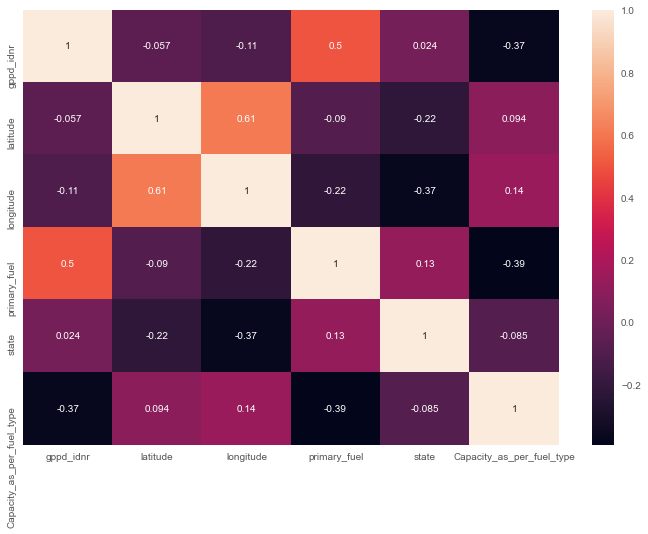

In [380]:
#Checking Correlation using heatmap
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

Observation: We see that we have some columns that have good positive correlation and some have negative correlation which is good for model building.

# Remarks: 
Here we have not checked outliers because every column is categorical except for the target column so there is no meaning in checking outliers. Even in longitude and latitude, it is useless to check outliers as it represents address only.

# Training Multiple models:

In [381]:
models={
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

# Splitting the train test data with random_state = 42

In [382]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

# Finding the best model:

**************************************** GradientBoostingRegressor **********************************************




Score 0.9959238895561572


MEAN_SQUARE_ERROR 2062.5037113975645


MEAN_ABSOLUTE_ERROR 17.11404902283808


RMSE 45.41479617258636


R2_SCORE 0.9959238895561572


MODEL PERFORMANCE CURVE


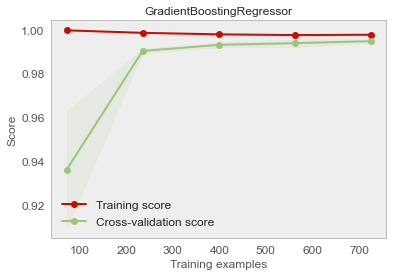

**************************************** LGBMRegressor **********************************************




Score 0.9955758901606321


MEAN_SQUARE_ERROR 26774.18414689234


MEAN_ABSOLUTE_ERROR 39.04290869119603


RMSE 163.62818872948617


R2_SCORE 0.9955758901606321


MODEL PERFORMANCE CURVE


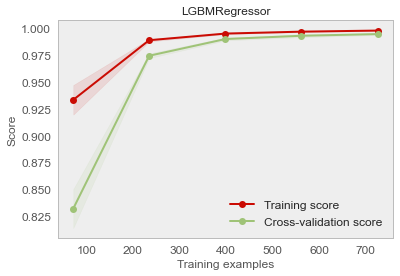

**************************************** RandomForestRegressor **********************************************




Score 0.9970822462000084


MEAN_SQUARE_ERROR 2225.9016770333683


MEAN_ABSOLUTE_ERROR 11.246176253011948


RMSE 47.17946244960161


R2_SCORE 0.9970822462000084


MODEL PERFORMANCE CURVE


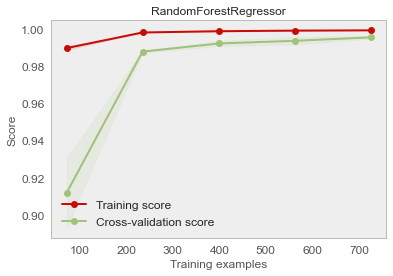

**************************************** XGBRegressor **********************************************




Score 0.9969554694137253


MEAN_SQUARE_ERROR 1317.7552321721087


MEAN_ABSOLUTE_ERROR 13.75771002658557


RMSE 36.30089850364738


R2_SCORE 0.9969554694137253


MODEL PERFORMANCE CURVE


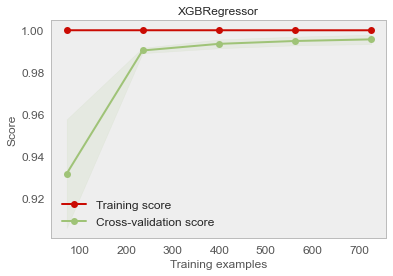

**************************************** ExtraTreesRegressor **********************************************




Score 0.9976339623127201


MEAN_SQUARE_ERROR 904.6827251146692


MEAN_ABSOLUTE_ERROR 6.234685839088021


RMSE 30.077944163700238


R2_SCORE 0.9976339623127201


MODEL PERFORMANCE CURVE


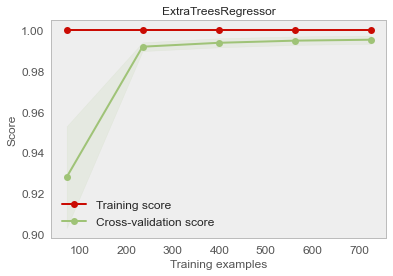

In [383]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
for name,model in models.items():
  print("****************************************",name,"**********************************************")
  Model.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("\n")
  cs=cross_val_score(model,X_new,y_new,cv=5,scoring='r2').mean()
  cvs.append(cs*100)
  mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
  Mse.append(mse)
  print("\n")
  sc=model.score(X_test,y_test)
  score.append(sc)
  print("Score",sc)
  print("\n")
  print("MEAN_SQUARE_ERROR",mse)
  print("\n")
  mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  Mae.append(mae)
  print("MEAN_ABSOLUTE_ERROR",mae)
  print("\n")
  rmse=np.sqrt(mse)
  print("RMSE",rmse)
  print("\n")
  print("R2_SCORE",r2_score(y_test,y_pred))
  print("\n")
  print("MODEL PERFORMANCE CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

In [384]:
#making a dataframe of the models
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':rmse
})

models_csv

,models,Score,Cross_val_score,Msa,Mae,RMSE
0,GradientBoostingRegressor,0.995924,99.491208,2062.503711,17.114049,30.077944
1,LGBMRegressor,0.995576,99.457470,26774.184147,39.042909,30.077944
2,RandomForestRegressor,0.997082,99.545612,2225.901677,11.246176,30.077944
3,XGBRegressor,0.996955,99.567740,1317.755232,13.757710,30.077944
4,ExtraTreesRegressor,0.997634,99.544698,904.682725,6.234686,30.077944


# Remarks: We are selecting ExtraTreeRegressor as our final model since it has less Mae value and less RMSE.

# Hyper parameter tuning on the best ML Model:

In [385]:
ETREE=ExtraTreesRegressor()
ETREE.fit(X_train,y_train)

ExtraTreesRegressor()

In [386]:
ETREE.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [387]:
params={'bootstrap': [False,True],
 'criterion': ['mse','mae'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2,3],
}

In [388]:
#using the Grid Search CV method for hyper parameter tuning the best model.
grid=GridSearchCV(estimator=ETREE,param_grid=params,n_jobs=-1,cv=5)

In [389]:
#training the Grid Search CV with the list of parameters it should check for best possible outcomes.
grid.fit(X_new,y_new)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2, 3]})

In [390]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': 3}

Remarks: Here the Grid Search CV has provided us with the best parameters list it has used to train the model.

In [391]:
grid.best_score_

0.9955763728516913

# Remarks: 

The CV score increases from 99.52% to 99.55%.

# Final model learning curve:

In [392]:
Etree=ExtraTreesRegressor(bootstrap= True,
 criterion= 'mse',
 max_depth= None,
 max_features= 'auto',
 max_samples= None)

<AxesSubplot:title={'center':'Final Model Learnig Curve'}, xlabel='Training examples', ylabel='Score'>

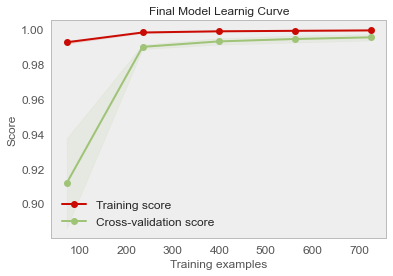

In [393]:
skplt.estimators.plot_learning_curve(Etree,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title='Final Model Learnig Curve')

# Final model Metrics:

In [394]:
Etree.fit(X_train,y_train)
y_pred=Etree.predict(X_test)

In [395]:
print("Mean squared error",mean_squared_error(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model score",Etree.score(X_test,y_test))

Mean squared error 0.009154108125223983
Mean absolute error 0.041707089912909195
R2 Score 0.9973665094196998
Model score 0.9973665094196998


# Saving and loading the model:

In [396]:
joblib.dump(grid,"Final_model_Regression.obj")
model=joblib.load('Final_model_Regression.obj')

In [397]:
pred=model.predict(X_test)
np.exp(pred)

array([1.35000e+01, 1.00000e+00, 7.20000e+01, 7.70000e+02, 4.50000e+00,
       1.50000e+00, 7.00000e+01, 2.55000e+01, 1.60000e+03, 3.30000e+02,
       3.32000e+01, 8.00000e+01, 6.40000e+01, 1.20000e+02, 1.02500e+01,
       1.05000e+01, 1.98000e+01, 1.05000e+02, 1.40000e+03, 1.50000e+01,
       1.20000e+03, 3.10000e+02, 1.00000e+00, 1.86000e+02, 4.60000e+01,
       5.00000e+00, 1.00000e+02, 5.00000e+00, 3.96000e+03, 1.05000e+01,
       2.00000e+02, 1.36500e+02, 6.48000e+02, 1.10000e+02, 6.00000e+01,
       3.00000e+02, 3.85000e+01, 6.00000e+02, 1.80000e+01, 6.50000e+01,
       3.50000e+01, 1.25000e+02, 9.00000e+01, 3.00000e+01, 2.10000e+01,
       2.05240e+02, 5.00000e+01, 2.70000e+02, 4.45000e+02, 6.00000e+00,
       1.05000e+01, 3.00000e+03, 7.89000e+01, 9.00000e+01, 2.10000e+01,
       1.50000e+01, 2.31000e+02, 3.50000e+01, 1.00000e+03, 5.00000e+00,
       1.80000e+01, 1.80000e+02, 3.00000e+02, 5.00000e+02, 1.00000e+00,
       3.00000e+01, 9.00000e+00, 1.12000e+01, 5.04000e+01, 3.500

# Preparing Data for Classification Model:

In [398]:
X=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']
x=X

# Checking outliers:

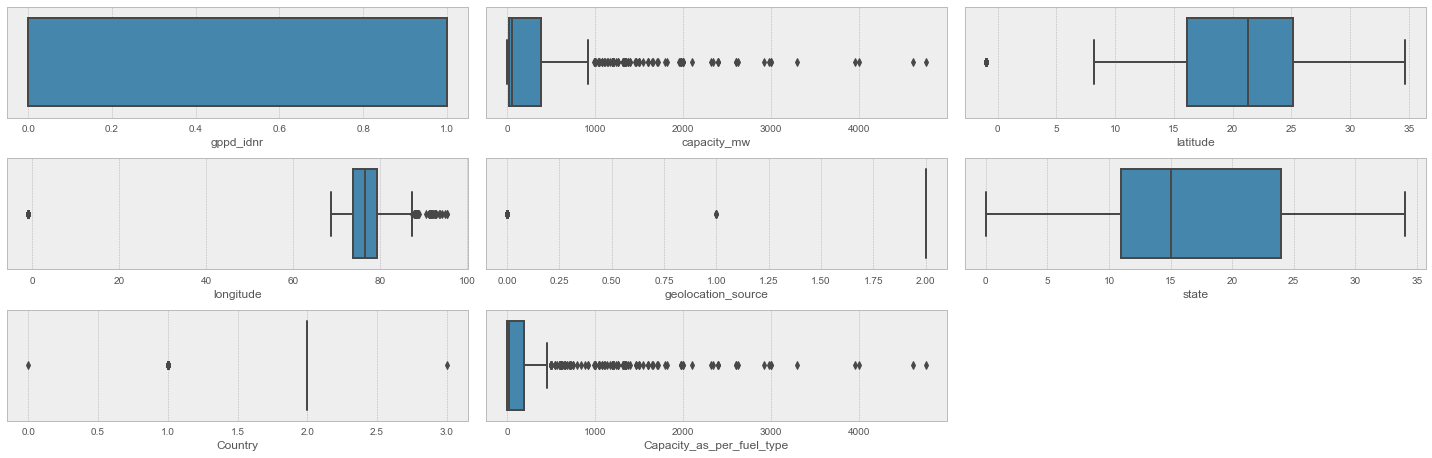

In [399]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Observation: We see that there are outliers present in some columns.

# Removing Outliers:

In [400]:
#using percentile method to remove outliers
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]]=percentile[0]
  X[col][X[col] >=percentile[1]]=percentile[1]

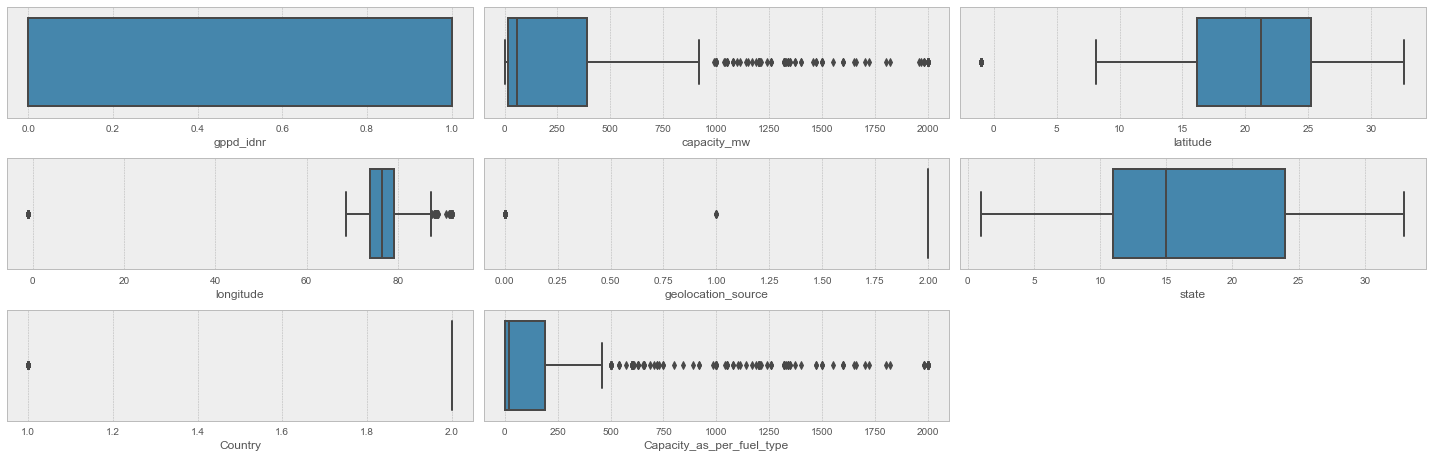

In [401]:
#after removing outliers
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: We did removed many outliers as seen in the above boxplots.

# Resolving the class imbalance issue in the target column using SMOTE method:

In [402]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['primary_fuel'])

Text(0.5, 1.0, 'Balanced Data')

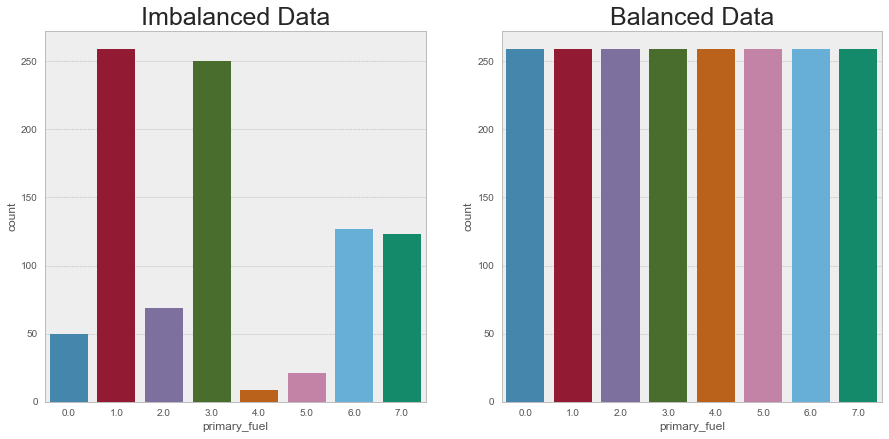

In [403]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=25)
plt.subplot(2,2,2)
sns.countplot(y_new['primary_fuel'])
plt.title("Balanced Data",fontsize=25)

Remarks: Data has been balanced so now our model can predict every class with good accuracy.

In [404]:
#checking value counts of target column before balancing
df['primary_fuel'].value_counts()

1.0    259
3.0    250
6.0    127
7.0    123
2.0     69
0.0     50
5.0     21
4.0      9
Name: primary_fuel, dtype: int64

In [405]:
#target coulumn value counts after balancing the data
y_new.value_counts()

primary_fuel
7.0             259
6.0             259
5.0             259
4.0             259
3.0             259
2.0             259
1.0             259
0.0             259
dtype: int64

Remarks: In the above cell, we can see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification ML model does not get biased towards one category.

# Checking skewness:

In [406]:
X_new.skew()

gppd_idnr                    0.050618
capacity_mw                  2.114801
latitude                    -0.669240
longitude                   -3.870374
geolocation_source          -2.335731
state                        0.210757
Country                     -4.274297
Capacity_as_per_fuel_type    3.549812
dtype: float64

Remarks: we see that there is skewed data present, so we will be removing it now.

In [407]:
#removing skewness
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [408]:
#checking skewness after removal
X_new.skew()

gppd_idnr                    0.028163
capacity_mw                  0.022901
latitude                    -0.254624
longitude                   -1.783624
geolocation_source          -2.303575
state                       -0.079212
Country                     -4.021528
Capacity_as_per_fuel_type    0.062546
dtype: float64

Remarks: Not entirely, but we did removed skewness upto certain level.

# Feature Scaling:

In [409]:
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [410]:
#splitting the train test data
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

# Training models:

In [411]:
#using stratifiedkfold here because it selects all classes at equal level
skf=StratifiedKFold(n_splits=5)

In [412]:
models={
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "XGBRegressor":XGBClassifier(),
    "LIGHTGBM":LGBMClassifier()
}

# Finding the best model:

*************************************************** GradientBoostingClassifier ************************************************************


Accuracy_Score 0.977491961414791


SCORE 0.977491961414791


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 81  1  0  0  0  0  0]
 [ 0  0 69  2  0  0  0  1]
 [ 0  0  4 74  3  0  0  0]
 [ 0  0  0  0 84  1  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  1 65  0]
 [ 0  0  0  0  0  0  0 79]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      0.99      0.99        82
         2.0       0.93      0.96      0.95        72
         3.0       0.97      0.91      0.94        81
         4.0       0.95      0.99      0.97        85
         5.0       0.98      0.99      0.98        81
         6.0       1.00      0.98      0.99        66
         7.0       0.99      1.00      0.99        79

    accuracy                           0.98     

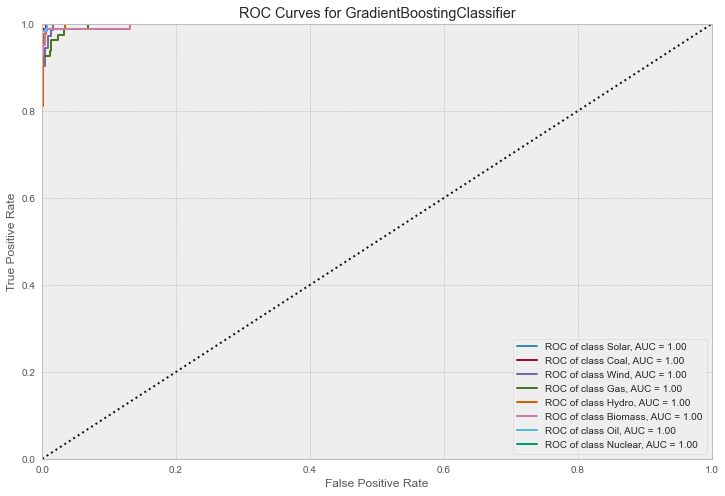

MODEL LEARNING CURVE


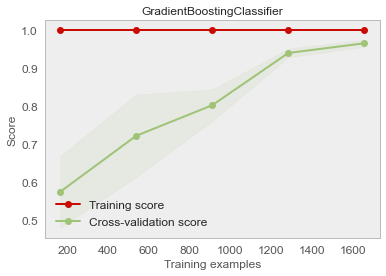

*************************************************** ExtraTreesRegressor ************************************************************


Accuracy_Score 0.9630225080385852


SCORE 0.9630225080385852


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 80  1  1  0  0  0  0]
 [ 0  1 64  3  1  1  0  2]
 [ 0  1  6 70  3  1  0  0]
 [ 0  0  0  0 85  0  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  0  0 79]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.98      0.98      0.98        82
         2.0       0.90      0.89      0.90        72
         3.0       0.95      0.86      0.90        81
         4.0       0.94      1.00      0.97        85
         5.0       0.98      0.99      0.98        81
         6.0       1.00      0.98      0.99        66
         7.0       0.96      1.00      0.98        79

    accuracy                           0.96       622

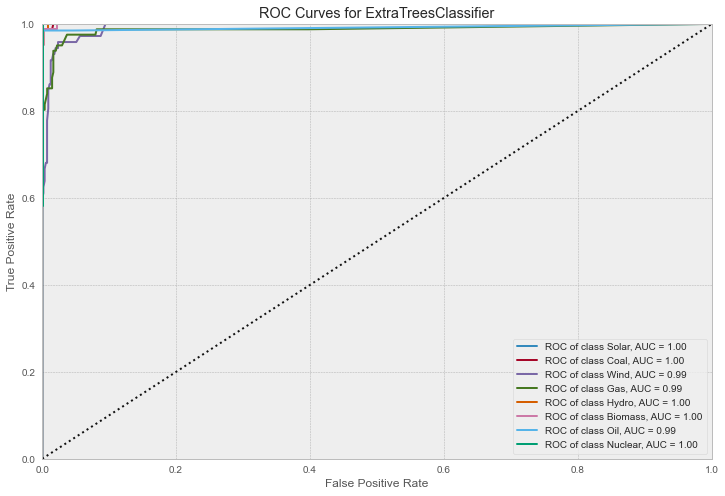

MODEL LEARNING CURVE


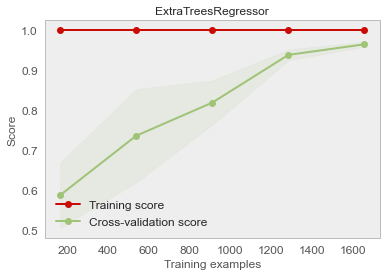

*************************************************** RandomForestRegressor ************************************************************


Accuracy_Score 0.9533762057877814


SCORE 0.9533762057877814


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 79  2  1  0  0  0  0]
 [ 0  4 61  3  3  0  0  1]
 [ 0  1  6 70  3  1  0  0]
 [ 0  0  0  0 84  1  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  1  0 78]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.94      0.96      0.95        82
         2.0       0.88      0.85      0.87        72
         3.0       0.95      0.86      0.90        81
         4.0       0.92      0.99      0.95        85
         5.0       0.96      0.99      0.98        81
         6.0       1.00      0.98      0.99        66
         7.0       0.97      0.99      0.98        79

    accuracy                           0.95       6

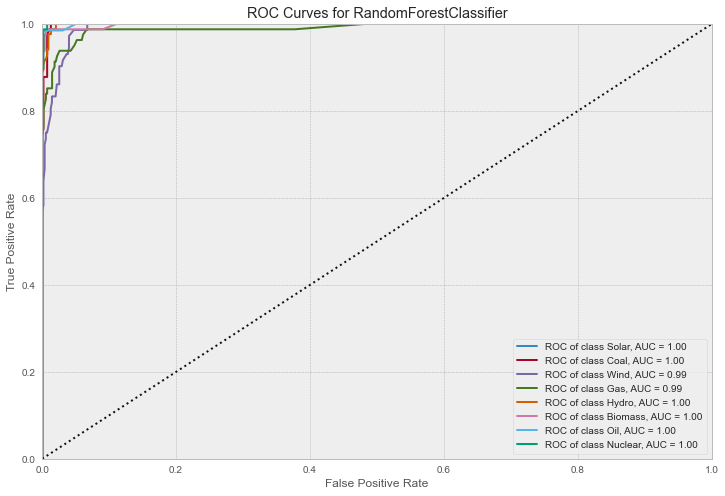

MODEL LEARNING CURVE


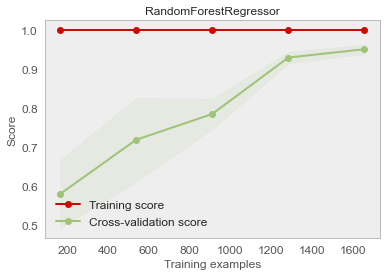

*************************************************** XGBRegressor ************************************************************
[03:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy_Score 0.9790996784565916


SCORE 0.9790996784565916


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  2 69  1  0  0  0  0]
 [ 0  0  3 74  4  0  0  0]
 [ 0  0  0  0 84  1  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  0  0 79]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.98      1.00      0.99        82
         2.0       0.96      0.96      0.96        72
         3.0       0

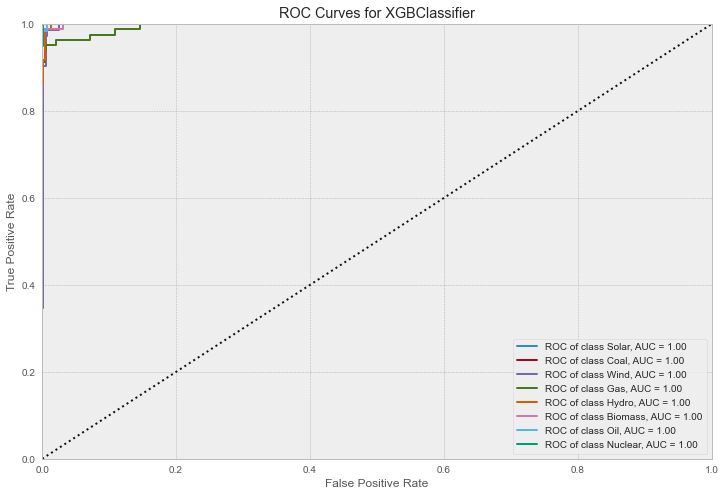

MODEL LEARNING CURVE
[03:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:45:59] WARNING: C:/Users/Administrator/wor

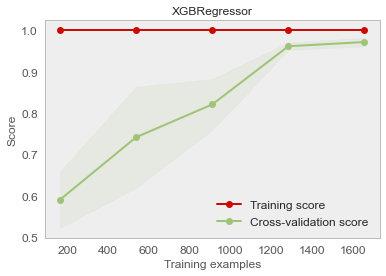

*************************************************** LIGHTGBM ************************************************************


Accuracy_Score 0.9855305466237942


SCORE 0.9855305466237942


Confusion metrics


[[76  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  1 70  1  0  0  0  0]
 [ 0  0  2 76  3  0  0  0]
 [ 0  0  0  0 85  0  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  0  0 79]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.99      1.00      0.99        82
         2.0       0.97      0.97      0.97        72
         3.0       0.99      0.94      0.96        81
         4.0       0.96      1.00      0.98        85
         5.0       1.00      0.99      0.99        81
         6.0       1.00      0.98      0.99        66
         7.0       0.99      1.00      0.99        79

    accuracy                           0.99       622
   macro a

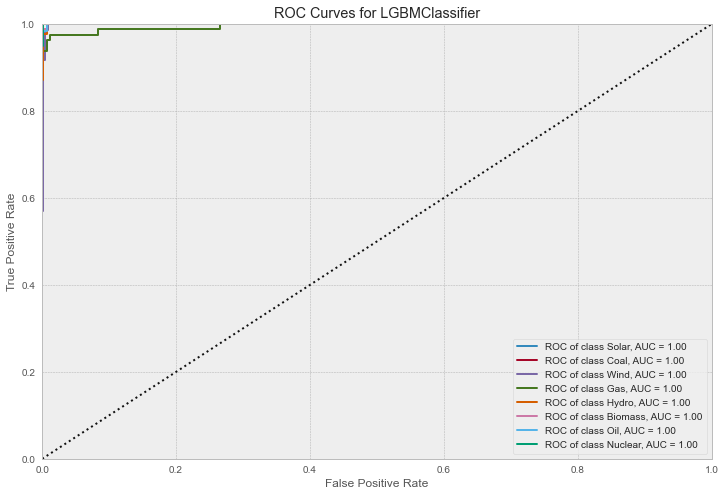

MODEL LEARNING CURVE


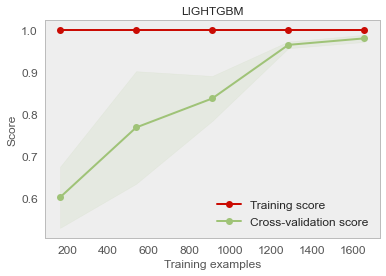

In [413]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],micro=False,macro=False)

  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

# Remarks: 

We will be selecting XGBClassifier as it is giving us cross_val_Score of 0.97 and good metrics of XGB model.

# Hyperparameter tuning our best ML model:

In [414]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

[03:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [415]:
XGB.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [416]:
param_class={
 'max_depth': [6,5,7],
 'n_jobs': [0,1,2],
 'num_parallel_tree': [1,2,3],
 'subsample': [1,2,3],
 'verbosity': [None,0,1,2]}

In [417]:
Grid_classifier=GridSearchCV(estimator=XGB,param_grid=param_class,n_jobs=-1,cv=5)

In [418]:
Grid_classifier.fit(X_new,y_new)

[04:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                      

In [419]:
Grid_classifier.best_params_

{'max_depth': 5,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'subsample': 1,
 'verbosity': None}

In [420]:
Grid_classifier.best_score_

0.9763587684069611

# Remarks: 
    
We found that the accuracy increased from 97.20% to 97.63% after hyperparameter tuning.

# Final Model Learning Curve:

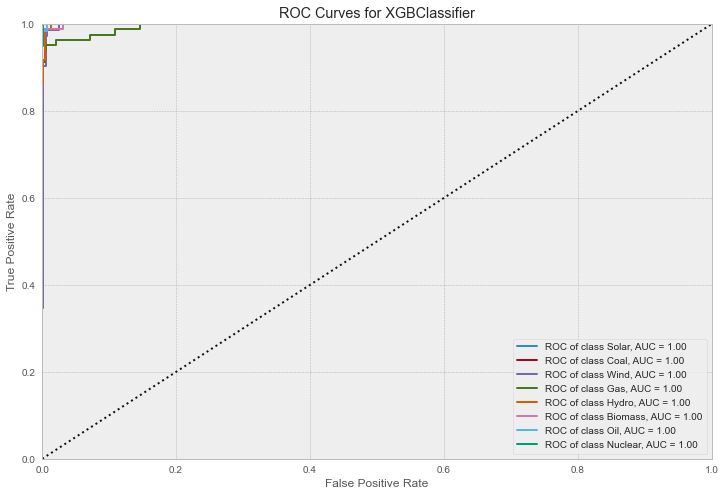

MODEL LEARNING CURVE
[04:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:19:03] WARNING: C:/Users/Administrator/wor

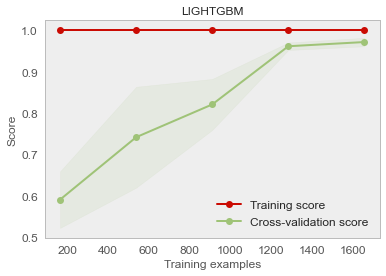

In [422]:
plt.figure(figsize=(12,8))
roc_auc(XGB,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(XGB,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

# Final Model Metrics:

In [424]:
XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_pred))
print("Confusion Matrics")
print('\n')
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

[04:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy_score 0.9790996784565916
Confusion Matrics


[[76  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  2 69  1  0  0  0  0]
 [ 0  0  3 74  4  0  0  0]
 [ 0  0  0  0 84  1  0  0]
 [ 0  0  0  0  1 80  0  0]
 [ 0  0  0  0  0  0 65  1]
 [ 0  0  0  0  0  0  0 79]]
Classification Report


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       0.98      1.00      0.99        82
         2.0       0.96      0.96      0.96        72
         3.0       0.99      0.91      0.95        81
         4.0       0.94      0.99      0.97        85
         5.0       0.99      0.99      0.99        81
         6.0   

# Saving the model:

In [425]:
joblib.dump(Grid_classifier,"Classification_Model_GPP.obj")

['Classification_Model_GPP.obj']

# Loading the model:

In [426]:
model=joblib.load('Classification_Model_GPP.obj')

In [427]:
model.predict(X_test)

array([4., 3., 3., 4., 6., 3., 3., 2., 6., 2., 7., 5., 2., 6., 0., 7., 1.,
       2., 3., 2., 7., 2., 6., 3., 7., 1., 4., 5., 7., 5., 1., 3., 7., 2.,
       5., 2., 3., 3., 1., 0., 2., 1., 4., 7., 7., 6., 3., 5., 3., 7., 4.,
       0., 6., 1., 5., 1., 3., 5., 1., 0., 5., 5., 5., 1., 4., 0., 7., 3.,
       4., 4., 1., 5., 3., 3., 7., 4., 1., 6., 7., 1., 3., 7., 3., 6., 7.,
       5., 0., 0., 4., 2., 2., 4., 7., 0., 2., 5., 4., 7., 2., 3., 5., 5.,
       7., 4., 1., 6., 3., 5., 0., 6., 1., 4., 4., 3., 7., 4., 2., 3., 7.,
       3., 7., 1., 4., 3., 3., 0., 4., 4., 0., 1., 1., 7., 3., 3., 0., 1.,
       7., 4., 1., 1., 6., 5., 3., 0., 4., 1., 6., 4., 7., 2., 6., 1., 5.,
       1., 0., 5., 4., 0., 5., 5., 4., 4., 4., 4., 3., 2., 5., 5., 3., 4.,
       7., 0., 1., 5., 0., 4., 7., 4., 2., 0., 1., 4., 5., 2., 0., 6., 0.,
       1., 4., 6., 2., 5., 5., 6., 2., 5., 6., 4., 5., 0., 1., 1., 3., 0.,
       4., 1., 0., 3., 4., 6., 1., 5., 6., 7., 1., 6., 7., 4., 6., 0., 3.,
       6., 5., 0., 4., 2.

# Conclusion:

1. In this model analysis, we build two models- (a) which can predict capacity_mw and (b) which can predict primary_fuel.

2. For the capacity_mw model, we did lot of EDA to understand the importnace of feature over target column.

3. There is longitude and latitude given in the dataset so with the help of it we extracted the city and state name and did EDA on them too.

4. We did feature engineering later where we added some columns like city and state and also added a column which shows for a particular fuel type how much capacity_mw was required.

5. We build a Regression model for the target column 'capacity_mw' and as ExtraTreeRegressor gave good accuracy and good metrics score so we chose it as our final model.

6. We did not removed outliers while building the regression model because all the columns were categorical and no continuous column was present.

7. For building the second model i.e., classification model, we used upsampling SMOTE as it doesn't paste the sample again and again but it does sampling synthetically.

8. Later we applied classifier algorithms and found that xgbclassifier was giving good metrics as compared to other classifiers so we proceeded with XGB to build our final classification model.

9. While building classification model, we removed outliers because there was some continous columns and we used percentile method to remove outliers because we would not lose data using this method as we know that data is important.